Load Data

In [17]:
!nvidia-smi

Mon Mar  3 11:04:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   39C    P8             16W /   40W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
import os

BASE_DIR = r"D:\SPECIES\SPECIES"


valid_extensions = (".jpg", ".jpeg", ".png")

total_files = 0

for root, _, files in os.walk(BASE_DIR):
    print(f"📂 ตรวจสอบโฟลเดอร์: {root} - มีไฟล์ {len(files)} ไฟล์")  # ตรวจสอบว่าโฟลเดอร์ไหนถูกนับ
    total_files += sum(1 for f in files if f.lower().endswith(valid_extensions))

print(f"\n📌 จำนวนไฟล์ที่ Python นับได้ทั้งหมด: {total_files}")


📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES - มีไฟล์ 0 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Ant - มีไฟล์ 826 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Bee - มีไฟล์ 1213 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Beetle - มีไฟล์ 932 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Butterfly - มีไฟล์ 878 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Cockroach - มีไฟล์ 104 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Dragonfly - มีไฟล์ 786 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Fly - มีไฟล์ 880 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Frog - มีไฟล์ 103 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Grasshopper - มีไฟล์ 940 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Ladybug - มีไฟล์ 654 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\lizard - มีไฟล์ 77 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Mosquito - มีไฟล์ 540 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Spider - มีไฟล์ 767 ไฟล์
📂 ตรวจสอบโฟลเดอร์: D:\SPECIES\SPECIES\Wasp - มีไฟล์ 813 ไฟล์

📌 จำนวนไฟล์ที่ Python นับได้ทั้งหมด: 9509


In [9]:
import os
from PIL import Image

# ตั้งค่าพาธของโฟลเดอร์ SPECIES
folder_path = r"D:\SPECIES\SPECIES"  # ใช้ r"" เพื่อป้องกันปัญหา Escape Character

# ตรวจสอบว่าโฟลเดอร์มีอยู่หรือไม่
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    species_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]  # ดึงเฉพาะโฟลเดอร์

    if species_folders:
        first_species_folder = os.path.join(folder_path, species_folders[0])  # เลือกโฟลเดอร์แรก
        files = [f for f in os.listdir(first_species_folder) if os.path.isfile(os.path.join(first_species_folder, f))]  # ดึงเฉพาะไฟล์

        if files:
            file_path = os.path.join(first_species_folder, files[0])  # เลือกไฟล์แรกของโฟลเดอร์

            # ตรวจสอบว่านามสกุลไฟล์เป็นอะไร
            ext = os.path.splitext(file_path)[-1].lower()

            if ext in [".jpg", ".jpeg", ".png"]:
                try:
                    with Image.open(file_path) as img:
                        img.show()  # แสดงภาพ
                        print("📌 เปิดรูปภาพสำเร็จ:", file_path)
                except Exception as e:
                    print(f"❌ ไม่สามารถเปิดรูปภาพได้: {e}")
            elif ext in [".txt", ".csv"]:
                try:
                    with open(file_path, "r", encoding="utf-8") as file:
                        content = file.read()
                        print("📌 อ่านไฟล์ข้อความสำเร็จ:", file_path)
                        print(content[:500])  # แสดงเฉพาะ 500 ตัวอักษรแรก
                except Exception as e:
                    print(f"❌ ไม่สามารถอ่านไฟล์ได้: {e}")
            else:
                print(f"⚠️ ไม่รองรับไฟล์ประเภทนี้: {file_path}")
        else:
            print("❌ ไม่มีไฟล์ในโฟลเดอร์:", first_species_folder)
    else:
        print("❌ ไม่มีโฟลเดอร์สายพันธุ์ใน:", folder_path)
else:
    print("❌ ไม่พบโฟลเดอร์หลัก:", folder_path)


📌 เปิดรูปภาพสำเร็จ: D:\SPECIES\SPECIES\Ant\Ant_102.jpg


In [19]:
import os
import random
import shutil
import torch
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image, ImageDraw

# Define dataset directories
ORIGINAL_BASE_DIR = r"D:\SPECIES\SPECIES"
PROCESSED_BASE_DIR = r"D:\SPECIES\PROCESSED"
TRAIN_DIR = os.path.join(PROCESSED_BASE_DIR, "train")
VAL_DIR = os.path.join(PROCESSED_BASE_DIR, "val")
TEST_DIR = os.path.join(PROCESSED_BASE_DIR, "test")

# Ensure processed directories exist
for dir_path in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    os.makedirs(dir_path, exist_ok=True)

# Check if ORIGINAL dataset directory exists
if not os.path.exists(ORIGINAL_BASE_DIR):
    raise FileNotFoundError(f"❌ ERROR: The dataset directory {ORIGINAL_BASE_DIR} does not exist!")

# Define species categories (dynamically read from ORIGINAL folder)
species_list = [d for d in os.listdir(ORIGINAL_BASE_DIR) if os.path.isdir(os.path.join(ORIGINAL_BASE_DIR, d))]

# If no species found, raise an error
if not species_list:
    raise FileNotFoundError("❌ ERROR: No species folders found in the original dataset directory!")

# Ensure species folders exist in processed dataset
for species in species_list:
    os.makedirs(os.path.join(TRAIN_DIR, species), exist_ok=True)
    os.makedirs(os.path.join(VAL_DIR, species), exist_ok=True)
    os.makedirs(os.path.join(TEST_DIR, species), exist_ok=True)

# Valid image extensions
valid_extensions = (".jpg", ".jpeg", ".png")

# Copy data from ORIGINAL to PROCESSED without modifying the original
print("Copying dataset to processed directory...")
for species in species_list:
    original_species_path = os.path.join(ORIGINAL_BASE_DIR, species)
    train_species_path = os.path.join(TRAIN_DIR, species)
    val_species_path = os.path.join(VAL_DIR, species)
    test_species_path = os.path.join(TEST_DIR, species)

    files = [f for f in os.listdir(original_species_path) if f.lower().endswith(valid_extensions)]
    total_files = len(files)

    if total_files == 0:
        print(f"⚠️ Warning: No images found for {species}, creating dummy images.")
        for folder in [train_species_path, val_species_path, test_species_path]:
            dummy_image_path = os.path.join(folder, "dummy.jpg")
            img = Image.new("RGB", (224, 224), color=(255, 255, 255))
            draw = ImageDraw.Draw(img)
            draw.text((50, 100), species, fill=(0, 0, 0))
            img.save(dummy_image_path)
        continue

    # Split data
    num_test = max(1, int(total_files * 0.15))  # Ensure at least 1 test sample
    num_val = max(1, int((total_files - num_test) * 0.2))
    random.shuffle(files)
    test_files = files[:num_test]
    val_files = files[num_test:num_test+num_val]
    train_files = files[num_test+num_val:]

    # Copy files instead of moving
    for f in test_files:
        shutil.copy(os.path.join(original_species_path, f), os.path.join(test_species_path, f))
    for f in val_files:
        shutil.copy(os.path.join(original_species_path, f), os.path.join(val_species_path, f))
    for f in train_files:
        shutil.copy(os.path.join(original_species_path, f), os.path.join(train_species_path, f))

# Define image transformations for data augmentation
transforms = {
    "train": T.Compose([
        T.Resize((224, 224)),
        T.RandomHorizontalFlip(),
        T.RandomRotation(30),
        T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        T.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    "test": T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Load dataset using ImageFolder
dataset = {
    "train": datasets.ImageFolder(root=TRAIN_DIR, transform=transforms["train"]),
    "val": datasets.ImageFolder(root=VAL_DIR, transform=transforms["test"]),
    "test": datasets.ImageFolder(root=TEST_DIR, transform=transforms["test"])
}

# Create DataLoaders for batching
dataloaders = {
    "train": DataLoader(dataset["train"], batch_size=32, shuffle=True, num_workers=4),
    "val": DataLoader(dataset["val"], batch_size=32, shuffle=False, num_workers=4),
    "test": DataLoader(dataset["test"], batch_size=32, shuffle=False, num_workers=4)
}

# Print dataset distribution
print("\n📌 จำนวนไฟล์ในแต่ละชุดข้อมูล:")
for category, directory in zip(["Train", "Validation", "Test"], [TRAIN_DIR, VAL_DIR, TEST_DIR]):
    print(f"{category}:")
    for species in species_list:
        species_path = os.path.join(directory, species)
        count = len(os.listdir(species_path)) if os.path.exists(species_path) else 0
        print(f"- {species}: {count} ไฟล์")


Copying dataset to processed directory...

📌 จำนวนไฟล์ในแต่ละชุดข้อมูล:
Train:
- Ant: 746 ไฟล์
- Bee: 1094 ไฟล์
- Beetle: 841 ไฟล์
- Butterfly: 782 ไฟล์
- Cockroach: 92 ไฟล์
- Dragonfly: 700 ไฟล์
- Fly: 794 ไฟล์
- Frog: 90 ไฟล์
- Grasshopper: 838 ไฟล์
- Ladybug: 586 ไฟล์
- lizard: 71 ไฟล์
- Mosquito: 474 ไฟล์
- Spider: 684 ไฟล์
- Wasp: 733 ไฟล์
Validation:
- Ant: 260 ไฟล์
- Bee: 381 ไฟล์
- Beetle: 291 ไฟล์
- Butterfly: 269 ไฟล์
- Cockroach: 33 ไฟล์
- Dragonfly: 244 ไฟล์
- Fly: 272 ไฟล์
- Frog: 31 ไฟล์
- Grasshopper: 293 ไฟล์
- Ladybug: 198 ไฟล์
- lizard: 25 ไฟล์
- Mosquito: 164 ไฟล์
- Spider: 234 ไฟล์
- Wasp: 247 ไฟล์
Test:
- Ant: 230 ไฟล์
- Bee: 334 ไฟล์
- Beetle: 260 ไฟล์
- Butterfly: 240 ไฟล์
- Cockroach: 25 ไฟล์
- Dragonfly: 213 ไฟล์
- Fly: 250 ไฟล์
- Frog: 26 ไฟล์
- Grasshopper: 259 ไฟล์
- Ladybug: 177 ไฟล์
- lizard: 19 ไฟล์
- Mosquito: 143 ไฟล์
- Spider: 218 ไฟล์
- Wasp: 228 ไฟล์


#Install Timm

In [17]:
pip install git+https://github.com/rwightman/pytorch-image-models.git
pip install lightning transformers datasets evaluate pillow==9.2.0


SyntaxError: invalid syntax (922063270.py, line 1)

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import DataLoader, random_split, Dataset

# Pytorch Image model (TIMM) library: a library for state-of-the-art image classification
import timm
import timm.optim
import timm.scheduler
from timm.data import ImageDataset, create_dataset, create_loader
from timm.data.transforms_factory import create_transform

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from PIL import Image

import evaluate

import numpy as np
import pandas as pd
from scipy import stats

from tqdm.auto import tqdm


import glob

from sklearn.model_selection import StratifiedKFold,KFold

from lightning.fabric import Fabric

from copy import copy

import shutil

from sklearn.utils.class_weight import compute_class_weight

##visualization Model

In [21]:
import subprocess
import sys
import torch
import timm
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader
from torchinfo import summary
from sklearn.model_selection import KFold
import evaluate
import torch.nn as nn
import torch.optim as optim

# Install missing libraries
try:
    import lightning.fabric as fabric
except ImportError:
    print("[INFO] Installing lightning.fabric...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lightning.fabric"])
    import lightning.fabric as fabric

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "gpu")
print(f"Using device: {device}")

# Define dataset path
train_dir = r"D:\SPECIES\PROCESSED\train"

# Define transforms
transforms = {
    "train": T.Compose([
        T.Resize((224, 224)),
        T.RandomHorizontalFlip(),
        T.RandomRotation(15),
        T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    "test": T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Load dataset
dataset = datasets.ImageFolder(root=train_dir, transform=transforms["train"])
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
print(f"Total images in dataset: {len(dataset)}")

Using device: cuda
Total images in dataset: 8525


In [22]:
import subprocess
import sys
import torch
import timm
import torchvision.transforms as T
from torchvision import datasets
from torch.utils.data import DataLoader
from torchinfo import summary
from sklearn.model_selection import KFold
import evaluate
import torch.nn as nn
import torch.optim as optim

# Define model
model_name = "mobilenetv2_100"
model = timm.create_model(model_name, pretrained=True, num_classes=len(dataset.classes)).to(device)

# Display model summary
summary(model, input_size=(16, 3, 224, 224), col_names=["input_size", "output_size", "num_params", "trainable"], col_width=20, row_settings=["var_names"])

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Enable mixed precision with Fabric
fabric = fabric.Fabric(accelerator="cuda", precision="16-mixed")
fabric.launch()
print("✅ Fabric launched successfully with 16-bit Mixed Precision")

# Cross-validation setup
k_splits = 5
kf = KFold(n_splits=k_splits, shuffle=True, random_state=42)
metric = evaluate.load("accuracy")

# Display available pretrained models
available_models = timm.list_models(pretrained=True)
print("\n📌 Available pretrained models:", available_models)

Using 16-bit Automatic Mixed Precision (AMP)
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


✅ Fabric launched successfully with 16-bit Mixed Precision

📌 Available pretrained models: ['aimv2_1b_patch14_224.apple_pt', 'aimv2_1b_patch14_336.apple_pt', 'aimv2_1b_patch14_448.apple_pt', 'aimv2_3b_patch14_224.apple_pt', 'aimv2_3b_patch14_336.apple_pt', 'aimv2_3b_patch14_448.apple_pt', 'aimv2_huge_patch14_224.apple_pt', 'aimv2_huge_patch14_336.apple_pt', 'aimv2_huge_patch14_448.apple_pt', 'aimv2_large_patch14_224.apple_pt', 'aimv2_large_patch14_224.apple_pt_dist', 'aimv2_large_patch14_336.apple_pt', 'aimv2_large_patch14_336.apple_pt_dist', 'aimv2_large_patch14_448.apple_pt', 'bat_resnext26ts.ch_in1k', 'beit_base_patch16_224.in22k_ft_in22k', 'beit_base_patch16_224.in22k_ft_in22k_in1k', 'beit_base_patch16_384.in22k_ft_in22k_in1k', 'beit_large_patch16_224.in22k_ft_in22k', 'beit_large_patch16_224.in22k_ft_in22k_in1k', 'beit_large_patch16_384.in22k_ft_in22k_in1k', 'beit_large_patch16_512.in22k_ft_in22k_in1k', 'beitv2_base_patch16_224.in1k_ft_in1k', 'beitv2_base_patch16_224.in1k_ft_in22k'

In [21]:
import timm
from torchinfo import summary

# เลือกโมเดล
model_name = "mobilenetv2_100"

# สร้างโมเดลจาก TIMM
model = timm.create_model(model_name, pretrained=True, num_classes=4)

# แสดงสรุปโครงสร้างโมเดล
summary(model,
        input_size=(16, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)


Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                   [16, 3, 224, 224]    [16, 4]              --                   True
├─Conv2d (conv_stem)                          [16, 3, 224, 224]    [16, 32, 112, 112]   864                  True
├─BatchNormAct2d (bn1)                        [16, 32, 112, 112]   [16, 32, 112, 112]   64                   True
│    └─Identity (drop)                        [16, 32, 112, 112]   [16, 32, 112, 112]   --                   --
│    └─ReLU6 (act)                            [16, 32, 112, 112]   [16, 32, 112, 112]   --                   --
├─Sequential (blocks)                         [16, 32, 112, 112]   [16, 320, 7, 7]      --                   True
│    └─Sequential (0)                         [16, 32, 112, 112]   [16, 16, 112, 112]   --                   True
│    │    └─DepthwiseSeparableConv (0)        [16, 32, 112, 112]   [16, 16, 112, 112]  

In [24]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
dataset = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=transforms["train"], # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

In [11]:
dataset.class_to_idx

{'Ant': 0,
 'Bee': 1,
 'Beetle': 2,
 'Butterfly': 3,
 'Cockroach': 4,
 'Dragonfly': 5,
 'Fly': 6,
 'Frog': 7,
 'Grasshopper': 8,
 'Ladybug': 9,
 'Mosquito': 10,
 'Spider': 11,
 'Wasp': 12,
 'lizard': 13}

In [23]:
len(dataset)

8525

In [24]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset
from sklearn.model_selection import KFold
import evaluate
from lightning.fabric import Fabric
import tensorflow as tf

# Set device and precision
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"GPU Count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"Current Device: {torch.cuda.current_device()}")
else:
    print("❌ No GPU detected!")

torch.backends.cuda.matmul.allow_tf32 = True
torch.set_float32_matmul_precision('high')
print("✅ Precision mode set to 'high'")

# Enable Fabric for Mixed Precision Training
fabric = Fabric(accelerator="cuda", precision="16-mixed")
fabric.launch()
print("✅ Fabric launched successfully with 16-bit Mixed Precision")

# Training configuration
num_epochs = 5
criterion = nn.CrossEntropyLoss()

# Cross Validation Configuration
k_splits = 5
metric = evaluate.load("accuracy")
kf = KFold(n_splits=k_splits, shuffle=True, random_state=42)

# Gradient Accumulation Settings
train_batch_size = 16
eval_batch_size = 8
num_accumulate = 1

# Define a Custom Dataset
class MyCustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create a Sample Dataset
data = np.random.rand(100, 3, 224, 224)  # 100 images, shape (3,224,224)
labels = np.random.randint(0, 4, 100)    # 100 labels (0-3)
dataset = MyCustomDataset(data, labels)

# Check Dataset
print(f"📌 Dataset Type: {type(dataset)}")
print(f"📌 Dataset Length: {len(dataset)}")
print(f"📌 Sample Data: {dataset[0]}")

# Load MNIST dataset and convert to PyTorch tensors
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = torch.tensor(train_images, dtype=torch.float32).unsqueeze(1) / 255.0  # Normalize
test_images = torch.tensor(test_images, dtype=torch.float32).unsqueeze(1) / 255.0
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Using 16-bit Automatic Mixed Precision (AMP)


PyTorch Version: 2.5.1+cu121
CUDA Available: True
GPU Count: 1
Current Device: 0
✅ Precision mode set to 'high'
✅ Fabric launched successfully with 16-bit Mixed Precision
📌 Dataset Type: <class '__main__.MyCustomDataset'>
📌 Dataset Length: 100
📌 Sample Data: (tensor([[[0.8809, 0.4177, 0.5794,  ..., 0.1641, 0.6813, 0.9804],
         [0.9069, 0.8505, 0.6319,  ..., 0.6222, 0.2768, 0.2357],
         [0.1586, 0.2614, 0.0888,  ..., 0.8796, 0.5814, 0.7424],
         ...,
         [0.6624, 0.4781, 0.2655,  ..., 0.5395, 0.8677, 0.1906],
         [0.0658, 0.5933, 0.5185,  ..., 0.4805, 0.6576, 0.2452],
         [0.9496, 0.5720, 0.5632,  ..., 0.2344, 0.5044, 0.2640]],

        [[0.2153, 0.2877, 0.5035,  ..., 0.8857, 0.3514, 0.0849],
         [0.1230, 0.1422, 0.2276,  ..., 0.6478, 0.7354, 0.5126],
         [0.5684, 0.3418, 0.3384,  ..., 0.0579, 0.8863, 0.1301],
         ...,
         [0.2875, 0.7893, 0.0658,  ..., 0.2333, 0.2170, 0.0667],
         [0.4918, 0.2658, 0.1860,  ..., 0.2411, 0.0221, 0.70

In [25]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
import timm
from tqdm import tqdm
from sklearn.model_selection import KFold
from lightning.fabric import Fabric

# Set device and enable mixed precision
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Using Device: {device}")

fabric = Fabric(accelerator=device, precision="16-mixed")  # ✅ Enable AMP for faster training
fabric.launch()
print("✅ Fabric launched successfully with 16-bit Mixed Precision")

# Model & Training Configurations
model_name = "mobilenetv3_large_100"  # ✅ Change to MobilenetV3 for better accuracy
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # ✅ Convert grayscale (1 channel) to RGB (3 channels)
    transforms.Resize((224, 224)),  # Resize for Mobilenet
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Dataset
dataset = datasets.MNIST(root="data", train=True, transform=transform, download=True)
k_splits = 5
kf = KFold(n_splits=k_splits, shuffle=True, random_state=42)

# Training Parameters
train_batch_size = 128  # ✅ Increase batch size for better efficiency
eval_batch_size = 256
num_epochs = 20  # ✅ Increase epochs for better learning
num_accumulate = 4  # ✅ Reduce gradient accumulation steps to speed up training

all_eval_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"\n🔹 Fold {fold + 1} of {k_splits}")

    # Load Model with Efficient Architecture
    model = timm.create_model(model_name, pretrained=True, num_classes=10)  # ✅ Use MobilenetV3
    model = model.to(device)

    # Optimizer & Scheduler
    optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)  # ✅ Lower learning rate for stability
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)  # ✅ Cosine LR Scheduler
    scaler = torch.cuda.amp.GradScaler()  # ✅ AMP Scaling for faster training

    # Load Data
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, num_workers=4,
                                  pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False, num_workers=4, pin_memory=True)

    # Train & Evaluation Info
    info = {"metric_train": [], "metric_val": [], "train_loss": [], "val_loss": [], "best_metric_val": -999}
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_loss_epoch, val_loss_epoch = [], []
        train_preds, train_targets = [], []
        val_preds, val_targets = [], []
        s1 = time.time()
        model.train()

        for idx, batch in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch + 1} Train")):
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            with torch.cuda.amp.autocast():
                outputs = model(inputs)
                loss = criterion(outputs, targets)

            scaler.scale(loss).backward()

            if ((idx + 1) % num_accumulate == 0) or (idx + 1 == len(train_dataloader)):
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
                scheduler.step()  # ✅ Update LR Scheduler

            train_loss_epoch.append(loss.item())
            train_preds += outputs.argmax(-1).detach().cpu().tolist()
            train_targets += targets.cpu().tolist()

        # Evaluation
        model.eval()
        with torch.no_grad():
            for batch in tqdm(val_dataloader, desc=f"Epoch {epoch + 1} Eval"):
                inputs, targets = batch
                inputs, targets = inputs.to(device), targets.to(device)

                with torch.cuda.amp.autocast():
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)

                val_loss_epoch.append(loss.item())
                val_preds += outputs.argmax(-1).detach().cpu().tolist()
                val_targets += targets.cpu().tolist()

        # Compute Accuracy
        metric_train = np.mean(np.array(train_preds) == np.array(train_targets))
        metric_val = np.mean(np.array(val_preds) == np.array(val_targets))

        info["metric_train"].append(metric_train)
        info["metric_val"].append(metric_val)
        info["train_loss"].append(np.mean(train_loss_epoch))
        info["val_loss"].append(np.mean(val_loss_epoch))

        if metric_val > info["best_metric_val"]:
            print("✅ New Best Score!")
            info["best_metric_val"] = metric_val
            torch.save(model.state_dict(), f"mobilenetv3_best_fold{fold}.pt")

        s2 = time.time()
        print(f"⏳ Fold: {fold} | Epoch: {epoch} | Time: {s2 - s1:.2f} sec | Metric: {metric_val:.4f} | Train Loss: {np.mean(train_loss_epoch):.4f} | Val Loss: {np.mean(val_loss_epoch):.4f}")

    all_eval_scores.append(info["best_metric_val"])

print("\n📌 K-Fold Evaluation Scores:")
for i, score in enumerate(all_eval_scores):
    print(f"Fold {i + 1}: {score:.4f}")

print(f"✅ Average Score: {np.mean(all_eval_scores):.4f}")


Using 16-bit Automatic Mixed Precision (AMP)


🚀 Using Device: cuda
✅ Fabric launched successfully with 16-bit Mixed Precision

🔹 Fold 1 of 5


C:\Users\raknu\AppData\Local\Temp\ipykernel_19180\2818673501.py:58: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # ✅ AMP Scaling for faster training
Epoch 1 Train:   0%|          | 0/375 [00:00<?, ?it/s]C:\Users\raknu\AppData\Local\Temp\ipykernel_19180\2818673501.py:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1 Train:   1%|          | 3/375 [00:18<26:47,  4.32s/it]  D:\SPECIES\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at

✅ New Best Score!
⏳ Fold: 0 | Epoch: 0 | Time: 134.66 sec | Metric: 0.8987 | Train Loss: 0.5775 | Val Loss: 0.3161


Epoch 2 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.06it/s]


✅ New Best Score!
⏳ Fold: 0 | Epoch: 1 | Time: 124.16 sec | Metric: 0.9792 | Train Loss: 0.0835 | Val Loss: 0.0662


Epoch 3 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.05it/s]


✅ New Best Score!
⏳ Fold: 0 | Epoch: 2 | Time: 107.72 sec | Metric: 0.9828 | Train Loss: 0.0550 | Val Loss: 0.0520


Epoch 4 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


✅ New Best Score!
⏳ Fold: 0 | Epoch: 3 | Time: 107.64 sec | Metric: 0.9862 | Train Loss: 0.0445 | Val Loss: nan


Epoch 5 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.05it/s]


⏳ Fold: 0 | Epoch: 4 | Time: 107.44 sec | Metric: 0.9862 | Train Loss: 0.0342 | Val Loss: 0.0441


Epoch 6 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.06it/s]


✅ New Best Score!
⏳ Fold: 0 | Epoch: 5 | Time: 107.47 sec | Metric: 0.9881 | Train Loss: 0.0301 | Val Loss: 0.0407


Epoch 7 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 0 | Epoch: 6 | Time: 109.56 sec | Metric: 0.9886 | Train Loss: 0.0252 | Val Loss: 0.0372


Epoch 8 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.01it/s]


⏳ Fold: 0 | Epoch: 7 | Time: 109.71 sec | Metric: 0.9881 | Train Loss: 0.0232 | Val Loss: 0.0388


Epoch 9 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


⏳ Fold: 0 | Epoch: 8 | Time: 107.96 sec | Metric: 0.9879 | Train Loss: 0.0199 | Val Loss: 0.0395


Epoch 10 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.04it/s]


✅ New Best Score!
⏳ Fold: 0 | Epoch: 9 | Time: 108.04 sec | Metric: 0.9903 | Train Loss: 0.0167 | Val Loss: 0.0334


Epoch 11 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.05it/s]


⏳ Fold: 0 | Epoch: 10 | Time: 107.69 sec | Metric: 0.9902 | Train Loss: 0.0152 | Val Loss: nan


Epoch 12 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


⏳ Fold: 0 | Epoch: 11 | Time: 108.10 sec | Metric: 0.9895 | Train Loss: 0.0145 | Val Loss: 0.0388


Epoch 13 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.06it/s]


⏳ Fold: 0 | Epoch: 12 | Time: 107.73 sec | Metric: 0.9879 | Train Loss: 0.0170 | Val Loss: nan


Epoch 14 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


⏳ Fold: 0 | Epoch: 13 | Time: 107.73 sec | Metric: 0.9892 | Train Loss: 0.0130 | Val Loss: nan


Epoch 15 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


⏳ Fold: 0 | Epoch: 14 | Time: 108.43 sec | Metric: 0.9900 | Train Loss: 0.0109 | Val Loss: 0.0343


Epoch 16 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.00it/s]


✅ New Best Score!
⏳ Fold: 0 | Epoch: 15 | Time: 108.27 sec | Metric: 0.9906 | Train Loss: 0.0086 | Val Loss: nan


Epoch 17 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


⏳ Fold: 0 | Epoch: 16 | Time: 107.92 sec | Metric: 0.9887 | Train Loss: 0.0083 | Val Loss: nan


Epoch 18 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.06it/s]


⏳ Fold: 0 | Epoch: 17 | Time: 107.76 sec | Metric: 0.9895 | Train Loss: 0.0099 | Val Loss: nan


Epoch 19 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.02it/s]


⏳ Fold: 0 | Epoch: 18 | Time: 108.16 sec | Metric: 0.9902 | Train Loss: 0.0089 | Val Loss: nan


Epoch 20 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 0 | Epoch: 19 | Time: 109.48 sec | Metric: 0.9888 | Train Loss: 0.0099 | Val Loss: nan

🔹 Fold 2 of 5


Epoch 1 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.01it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 0 | Time: 109.77 sec | Metric: 0.9643 | Train Loss: 0.5899 | Val Loss: 0.1080


Epoch 2 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 1 | Time: 108.06 sec | Metric: 0.9776 | Train Loss: 0.0879 | Val Loss: 0.0716


Epoch 3 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.85it/s]


⏳ Fold: 1 | Epoch: 2 | Time: 111.47 sec | Metric: 0.9213 | Train Loss: 0.0615 | Val Loss: 0.2445


Epoch 4 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.88it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 3 | Time: 110.73 sec | Metric: 0.9857 | Train Loss: 0.0452 | Val Loss: 0.0442


Epoch 5 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 4 | Time: 109.85 sec | Metric: 0.9870 | Train Loss: 0.0368 | Val Loss: 0.0372


Epoch 6 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


⏳ Fold: 1 | Epoch: 5 | Time: 110.08 sec | Metric: 0.9832 | Train Loss: 0.0307 | Val Loss: nan


Epoch 7 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 6 | Time: 110.08 sec | Metric: 0.9882 | Train Loss: 0.0275 | Val Loss: 0.0381


Epoch 8 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.06it/s]


⏳ Fold: 1 | Epoch: 7 | Time: 108.26 sec | Metric: 0.9879 | Train Loss: 0.0240 | Val Loss: nan


Epoch 9 Eval: 100%|██████████| 47/47 [00:23<00:00,  1.97it/s]


⏳ Fold: 1 | Epoch: 8 | Time: 108.96 sec | Metric: 0.9874 | Train Loss: 0.0206 | Val Loss: 0.0394


Epoch 10 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 9 | Time: 108.02 sec | Metric: 0.9889 | Train Loss: 0.0185 | Val Loss: 0.0335


Epoch 11 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 10 | Time: 108.18 sec | Metric: 0.9894 | Train Loss: 0.0158 | Val Loss: 0.0356


Epoch 12 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.05it/s]


⏳ Fold: 1 | Epoch: 11 | Time: 108.64 sec | Metric: 0.9868 | Train Loss: 0.0150 | Val Loss: 0.0427


Epoch 13 Eval: 100%|██████████| 47/47 [00:22<00:00,  2.05it/s]


⏳ Fold: 1 | Epoch: 12 | Time: 107.94 sec | Metric: 0.9888 | Train Loss: 0.0134 | Val Loss: nan


Epoch 14 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 1 | Epoch: 13 | Time: 109.73 sec | Metric: 0.9890 | Train Loss: 0.0121 | Val Loss: nan


Epoch 15 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.01it/s]


⏳ Fold: 1 | Epoch: 14 | Time: 108.98 sec | Metric: 0.9886 | Train Loss: 0.0114 | Val Loss: 0.0386


Epoch 16 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


⏳ Fold: 1 | Epoch: 15 | Time: 108.06 sec | Metric: 0.9892 | Train Loss: 0.0097 | Val Loss: 0.0395


Epoch 17 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


⏳ Fold: 1 | Epoch: 16 | Time: 108.22 sec | Metric: 0.9891 | Train Loss: 0.0085 | Val Loss: 0.0396


Epoch 18 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


⏳ Fold: 1 | Epoch: 17 | Time: 108.00 sec | Metric: 0.9884 | Train Loss: 0.0081 | Val Loss: nan


Epoch 19 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.81it/s]


✅ New Best Score!
⏳ Fold: 1 | Epoch: 18 | Time: 111.26 sec | Metric: 0.9908 | Train Loss: 0.0072 | Val Loss: 0.0397


Epoch 20 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.83it/s]


⏳ Fold: 1 | Epoch: 19 | Time: 111.90 sec | Metric: 0.9899 | Train Loss: 0.0080 | Val Loss: nan

🔹 Fold 3 of 5


Epoch 1 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 0 | Time: 110.45 sec | Metric: 0.9678 | Train Loss: 0.5316 | Val Loss: 0.1052


Epoch 2 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.89it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 1 | Time: 111.06 sec | Metric: 0.9791 | Train Loss: 0.0815 | Val Loss: 0.0774


Epoch 3 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 2 | Time: 111.57 sec | Metric: 0.9808 | Train Loss: 0.0560 | Val Loss: 0.0560


Epoch 4 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 3 | Time: 111.42 sec | Metric: 0.9838 | Train Loss: 0.0428 | Val Loss: nan


Epoch 5 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.94it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 4 | Time: 110.48 sec | Metric: 0.9866 | Train Loss: 0.0347 | Val Loss: 0.0399


Epoch 6 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 5 | Time: 110.83 sec | Metric: 0.9872 | Train Loss: 0.0309 | Val Loss: nan


Epoch 7 Eval: 100%|██████████| 47/47 [00:27<00:00,  1.72it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 6 | Time: 113.27 sec | Metric: 0.9898 | Train Loss: 0.0246 | Val Loss: 0.0371


Epoch 8 Eval: 100%|██████████| 47/47 [00:23<00:00,  1.99it/s]


⏳ Fold: 2 | Epoch: 7 | Time: 109.94 sec | Metric: 0.9898 | Train Loss: 0.0235 | Val Loss: nan


Epoch 9 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.01it/s]


⏳ Fold: 2 | Epoch: 8 | Time: 108.99 sec | Metric: 0.9885 | Train Loss: 0.0212 | Val Loss: nan


Epoch 10 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


⏳ Fold: 2 | Epoch: 9 | Time: 112.00 sec | Metric: 0.9897 | Train Loss: 0.0188 | Val Loss: nan


Epoch 11 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.88it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 10 | Time: 111.10 sec | Metric: 0.9900 | Train Loss: 0.0149 | Val Loss: 0.0353


Epoch 12 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.88it/s]


⏳ Fold: 2 | Epoch: 11 | Time: 111.25 sec | Metric: 0.9889 | Train Loss: 0.0155 | Val Loss: 0.0370


Epoch 13 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.87it/s]


⏳ Fold: 2 | Epoch: 12 | Time: 111.52 sec | Metric: 0.9892 | Train Loss: 0.0143 | Val Loss: 0.0348


Epoch 14 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.84it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 13 | Time: 111.87 sec | Metric: 0.9906 | Train Loss: 0.0129 | Val Loss: nan


Epoch 15 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.88it/s]


⏳ Fold: 2 | Epoch: 14 | Time: 110.90 sec | Metric: 0.9901 | Train Loss: 0.0105 | Val Loss: nan


Epoch 16 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


⏳ Fold: 2 | Epoch: 15 | Time: 110.87 sec | Metric: 0.9906 | Train Loss: 0.0100 | Val Loss: nan


Epoch 17 Eval: 100%|██████████| 47/47 [00:27<00:00,  1.72it/s]


⏳ Fold: 2 | Epoch: 16 | Time: 113.79 sec | Metric: 0.9906 | Train Loss: 0.0090 | Val Loss: nan


Epoch 18 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


✅ New Best Score!
⏳ Fold: 2 | Epoch: 17 | Time: 111.01 sec | Metric: 0.9910 | Train Loss: 0.0082 | Val Loss: nan


Epoch 19 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


⏳ Fold: 2 | Epoch: 18 | Time: 110.58 sec | Metric: 0.9902 | Train Loss: 0.0068 | Val Loss: nan


Epoch 20 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 2 | Epoch: 19 | Time: 110.89 sec | Metric: 0.9890 | Train Loss: 0.0070 | Val Loss: nan

🔹 Fold 4 of 5


Epoch 1 Eval: 100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 0 | Time: 113.44 sec | Metric: 0.9658 | Train Loss: 0.5612 | Val Loss: 0.1161


Epoch 2 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 1 | Time: 111.59 sec | Metric: 0.9788 | Train Loss: 0.0852 | Val Loss: 0.0796


Epoch 3 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 2 | Time: 110.91 sec | Metric: 0.9811 | Train Loss: 0.0553 | Val Loss: 0.0765


Epoch 4 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 3 | Time: 111.64 sec | Metric: 0.9831 | Train Loss: 0.0421 | Val Loss: 0.0770


Epoch 5 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 4 | Time: 110.83 sec | Metric: 0.9879 | Train Loss: 0.0353 | Val Loss: 0.0395


Epoch 6 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 3 | Epoch: 5 | Time: 111.03 sec | Metric: 0.9868 | Train Loss: 0.0311 | Val Loss: nan


Epoch 7 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


⏳ Fold: 3 | Epoch: 6 | Time: 110.81 sec | Metric: 0.9874 | Train Loss: 0.0265 | Val Loss: 0.0439


Epoch 8 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 7 | Time: 111.16 sec | Metric: 0.9887 | Train Loss: 0.0234 | Val Loss: 0.0439


Epoch 9 Eval: 100%|██████████| 47/47 [00:26<00:00,  1.79it/s]


⏳ Fold: 3 | Epoch: 8 | Time: 113.05 sec | Metric: 0.9879 | Train Loss: 0.0196 | Val Loss: nan


Epoch 10 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


⏳ Fold: 3 | Epoch: 9 | Time: 110.47 sec | Metric: 0.9881 | Train Loss: 0.0174 | Val Loss: nan


Epoch 11 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 3 | Epoch: 10 | Time: 110.52 sec | Metric: 0.9882 | Train Loss: 0.0173 | Val Loss: 0.0387


Epoch 12 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 3 | Epoch: 11 | Time: 111.49 sec | Metric: 0.9869 | Train Loss: 0.0159 | Val Loss: 0.0458


Epoch 13 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.94it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 12 | Time: 110.65 sec | Metric: 0.9897 | Train Loss: 0.0120 | Val Loss: nan


Epoch 14 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 3 | Epoch: 13 | Time: 110.11 sec | Metric: 0.9888 | Train Loss: 0.0141 | Val Loss: nan


Epoch 15 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


⏳ Fold: 3 | Epoch: 14 | Time: 111.36 sec | Metric: 0.9894 | Train Loss: 0.0129 | Val Loss: nan


Epoch 16 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 15 | Time: 110.32 sec | Metric: 0.9899 | Train Loss: 0.0112 | Val Loss: 0.0369


Epoch 17 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.87it/s]


⏳ Fold: 3 | Epoch: 16 | Time: 111.70 sec | Metric: 0.9884 | Train Loss: 0.0097 | Val Loss: 0.0393


Epoch 18 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


⏳ Fold: 3 | Epoch: 17 | Time: 109.90 sec | Metric: 0.9884 | Train Loss: 0.0076 | Val Loss: 0.0397


Epoch 19 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.02it/s]


✅ New Best Score!
⏳ Fold: 3 | Epoch: 18 | Time: 109.13 sec | Metric: 0.9904 | Train Loss: 0.0079 | Val Loss: 0.0389


Epoch 20 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


⏳ Fold: 3 | Epoch: 19 | Time: 110.56 sec | Metric: 0.9898 | Train Loss: 0.0064 | Val Loss: 0.0412

🔹 Fold 5 of 5


Epoch 1 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


✅ New Best Score!
⏳ Fold: 4 | Epoch: 0 | Time: 111.34 sec | Metric: 0.9649 | Train Loss: 0.4961 | Val Loss: 0.1138


Epoch 2 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


✅ New Best Score!
⏳ Fold: 4 | Epoch: 1 | Time: 111.03 sec | Metric: 0.9802 | Train Loss: 0.0847 | Val Loss: nan


Epoch 3 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 4 | Epoch: 2 | Time: 111.33 sec | Metric: 0.9821 | Train Loss: 0.0578 | Val Loss: nan


Epoch 4 Eval: 100%|██████████| 47/47 [00:26<00:00,  1.77it/s]


✅ New Best Score!
⏳ Fold: 4 | Epoch: 3 | Time: 113.17 sec | Metric: 0.9842 | Train Loss: 0.0448 | Val Loss: 0.0513


Epoch 5 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]


✅ New Best Score!
⏳ Fold: 4 | Epoch: 4 | Time: 111.25 sec | Metric: 0.9869 | Train Loss: 0.0364 | Val Loss: 0.0432


Epoch 6 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.94it/s]


⏳ Fold: 4 | Epoch: 5 | Time: 110.81 sec | Metric: 0.9838 | Train Loss: 0.0299 | Val Loss: nan


Epoch 7 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 4 | Epoch: 6 | Time: 110.97 sec | Metric: 0.9859 | Train Loss: 0.0268 | Val Loss: nan


Epoch 8 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.93it/s]


✅ New Best Score!
⏳ Fold: 4 | Epoch: 7 | Time: 110.70 sec | Metric: 0.9879 | Train Loss: 0.0234 | Val Loss: 0.0397


Epoch 9 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.82it/s]


⏳ Fold: 4 | Epoch: 8 | Time: 112.34 sec | Metric: 0.9868 | Train Loss: 0.0201 | Val Loss: nan


Epoch 10 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


✅ New Best Score!
⏳ Fold: 4 | Epoch: 9 | Time: 110.74 sec | Metric: 0.9899 | Train Loss: 0.0174 | Val Loss: 0.0377


Epoch 11 Eval: 100%|██████████| 47/47 [00:26<00:00,  1.79it/s]


⏳ Fold: 4 | Epoch: 10 | Time: 112.76 sec | Metric: 0.9889 | Train Loss: 0.0167 | Val Loss: 0.0392


Epoch 12 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.92it/s]


⏳ Fold: 4 | Epoch: 11 | Time: 110.85 sec | Metric: 0.9834 | Train Loss: 0.0139 | Val Loss: nan


Epoch 13 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.94it/s]


⏳ Fold: 4 | Epoch: 12 | Time: 110.57 sec | Metric: 0.9887 | Train Loss: 0.0134 | Val Loss: nan


Epoch 14 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.87it/s]


⏳ Fold: 4 | Epoch: 13 | Time: 111.37 sec | Metric: 0.9884 | Train Loss: 0.0113 | Val Loss: nan


Epoch 15 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.87it/s]


⏳ Fold: 4 | Epoch: 14 | Time: 111.36 sec | Metric: 0.9882 | Train Loss: 0.0119 | Val Loss: 0.0412


Epoch 16 Eval: 100%|██████████| 47/47 [00:25<00:00,  1.87it/s]


⏳ Fold: 4 | Epoch: 15 | Time: 111.43 sec | Metric: 0.9890 | Train Loss: 0.0106 | Val Loss: nan


Epoch 17 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]


⏳ Fold: 4 | Epoch: 16 | Time: 110.74 sec | Metric: 0.9880 | Train Loss: 0.0105 | Val Loss: 0.0474


Epoch 18 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


⏳ Fold: 4 | Epoch: 17 | Time: 109.33 sec | Metric: 0.9891 | Train Loss: 0.0111 | Val Loss: nan


Epoch 19 Eval: 100%|██████████| 47/47 [00:23<00:00,  2.02it/s]


⏳ Fold: 4 | Epoch: 18 | Time: 108.95 sec | Metric: 0.9886 | Train Loss: 0.0087 | Val Loss: nan


Epoch 20 Eval: 100%|██████████| 47/47 [00:24<00:00,  1.93it/s]

✅ New Best Score!
⏳ Fold: 4 | Epoch: 19 | Time: 109.97 sec | Metric: 0.9901 | Train Loss: 0.0075 | Val Loss: nan

📌 K-Fold Evaluation Scores:
Fold 1: 0.9906
Fold 2: 0.9908
Fold 3: 0.9910
Fold 4: 0.9904
Fold 5: 0.9901
✅ Average Score: 0.9906


In [28]:
classname = dataset.classes
classname

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [38]:
model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=10)  # ใช้ num_classes=10 เหมือนเดิม
model.load_state_dict(torch.load(f"mobilenetv2_100_checkpoint_fold{fold}.pt"))
model.to(device)
model.eval()


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2825075704.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"mobilenetv2_100_checkpoin

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): ReLU6(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU6(inplace=True)
        )
        (aa): Identity()
        (se): Identity()
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
        (drop_path): Identity()
      )
    )
    (1): Sequent

In [39]:
# โหลดโมเดลที่มี num_classes ใหม่
model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=4)  # ตั้งค่า num_classes ให้ตรงกับข้อมูลใหม่
checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{fold}.pt")

# ลบค่า weight ของ classifier ออก เพื่อหลีกเลี่ยงขนาดที่ไม่ตรงกัน
del checkpoint["classifier.weight"]
del checkpoint["classifier.bias"]

# โหลดพารามิเตอร์ที่เหลือ
model.load_state_dict(checkpoint, strict=False)

# ส่งไปที่ GPU ถ้ามี
model.to(device)
model.eval()


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2914613921.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{fo

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): ReLU6(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU6(inplace=True)
        )
        (aa): Identity()
        (se): Identity()
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
        (drop_path): Identity()
      )
    )
    (1): Sequent

In [40]:
import timm
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 สร้างโมเดลที่มี num_classes = 10 (ให้ตรงกับโมเดลที่บันทึกไว้)
model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=10)

# 🔹 โหลด state_dict
checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{fold}.pt", map_location=device)

# 🔹 โหลดพารามิเตอร์เข้าโมเดล
model.load_state_dict(checkpoint)

# 🔹 ส่งโมเดลไปที่ GPU (ถ้ามี)
model.to(device)
model.eval()

print("✅ โหลดโมเดลสำเร็จ!")


✅ โหลดโมเดลสำเร็จ!


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\180649468.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{fo

C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\1999240594.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{f


🔹 Evaluating Fold 1/5


100%|██████████| 94/94 [00:23<00:00,  4.03it/s]


✅ Fold 0 - Evaluation Done!


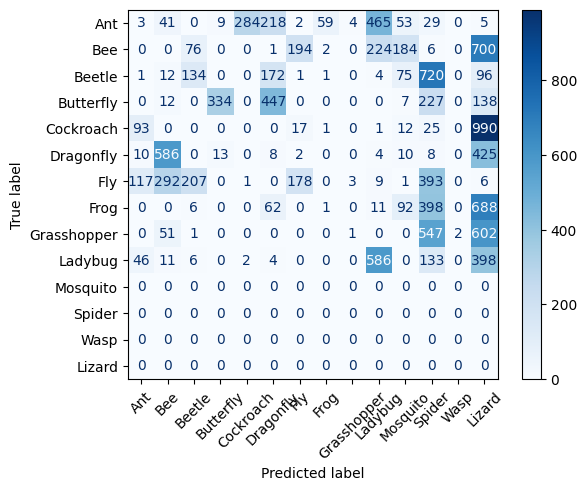

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\1999240594.py:27: FutureWarning: You a


🔹 Classification Report
              precision    recall  f1-score   support

         Ant       0.01      0.00      0.00      1172
         Bee       0.00      0.00      0.00      1387
      Beetle       0.31      0.11      0.16      1216
   Butterfly       0.94      0.29      0.44      1165
   Cockroach       0.00      0.00      0.00      1139
   Dragonfly       0.01      0.01      0.01      1066
         Fly       0.45      0.15      0.22      1207
        Frog       0.02      0.00      0.00      1258
 Grasshopper       0.12      0.00      0.00      1204
     Ladybug       0.45      0.49      0.47      1186
    Mosquito       0.00      0.00      0.00         0
      Spider       0.00      0.00      0.00         0
        Wasp       0.00      0.00      0.00         0
      Lizard       0.00      0.00      0.00         0

    accuracy                           0.10     12000
   macro avg       0.17      0.08      0.09     12000
weighted avg       0.23      0.10      0.13     12000



100%|██████████| 94/94 [00:22<00:00,  4.10it/s]


✅ Fold 1 - Evaluation Done!


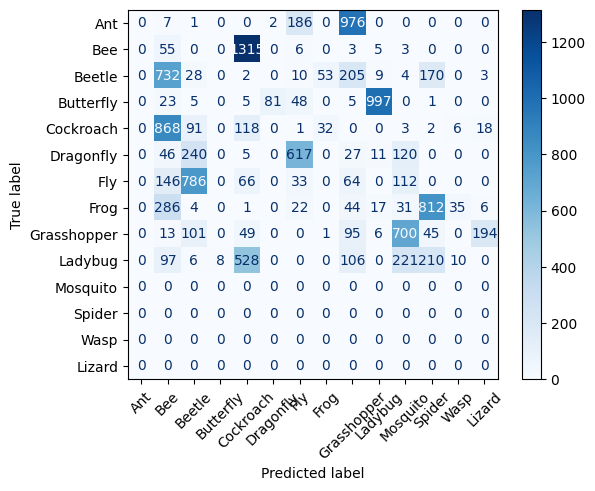

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:15


🔹 Classification Report
              precision    recall  f1-score   support

         Ant       0.00      0.00      0.00      1172
         Bee       0.02      0.04      0.03      1387
      Beetle       0.02      0.02      0.02      1216
   Butterfly       0.00      0.00      0.00      1165
   Cockroach       0.06      0.10      0.07      1139
   Dragonfly       0.00      0.00      0.00      1066
         Fly       0.04      0.03      0.03      1207
        Frog       0.00      0.00      0.00      1258
 Grasshopper       0.06      0.08      0.07      1204
     Ladybug       0.00      0.00      0.00      1186
    Mosquito       0.00      0.00      0.00         0
      Spider       0.00      0.00      0.00         0
        Wasp       0.00      0.00      0.00         0
      Lizard       0.00      0.00      0.00         0

    accuracy                           0.03     12000
   macro avg       0.01      0.02      0.02     12000
weighted avg       0.02      0.03      0.02     12000



100%|██████████| 94/94 [00:23<00:00,  4.04it/s]


✅ Fold 2 - Evaluation Done!


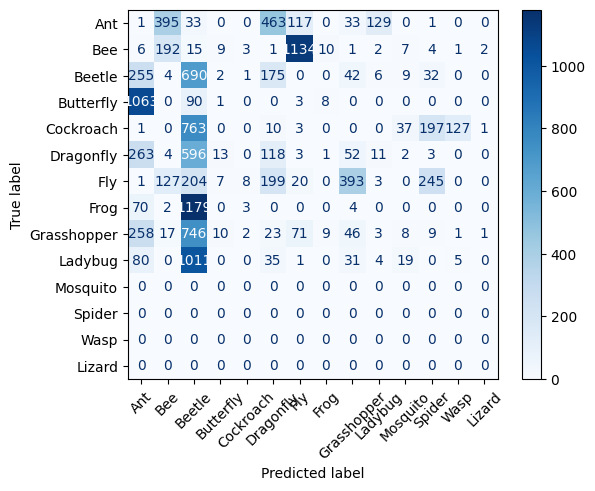

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\1999240594.py:27: FutureWarning: You a


🔹 Classification Report
              precision    recall  f1-score   support

         Ant       0.00      0.00      0.00      1172
         Bee       0.26      0.14      0.18      1387
      Beetle       0.13      0.57      0.21      1216
   Butterfly       0.02      0.00      0.00      1165
   Cockroach       0.00      0.00      0.00      1139
   Dragonfly       0.12      0.11      0.11      1066
         Fly       0.01      0.02      0.02      1207
        Frog       0.00      0.00      0.00      1258
 Grasshopper       0.08      0.04      0.05      1204
     Ladybug       0.03      0.00      0.01      1186
    Mosquito       0.00      0.00      0.00         0
      Spider       0.00      0.00      0.00         0
        Wasp       0.00      0.00      0.00         0
      Lizard       0.00      0.00      0.00         0

    accuracy                           0.09     12000
   macro avg       0.05      0.06      0.04     12000
weighted avg       0.07      0.09      0.06     12000



100%|██████████| 94/94 [00:23<00:00,  4.03it/s]


✅ Fold 3 - Evaluation Done!


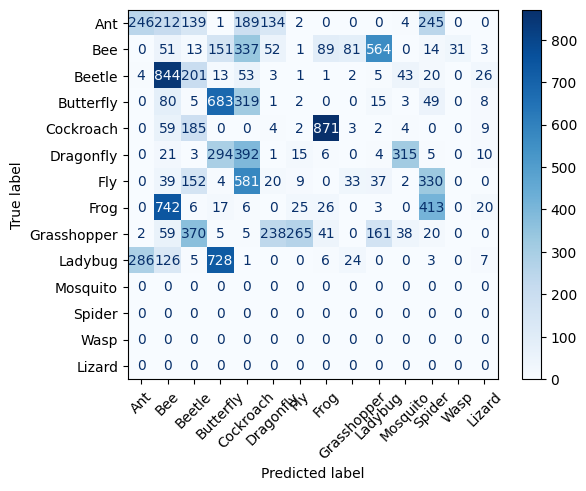

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\1999240594.py:27: FutureWarning: You a


🔹 Classification Report
              precision    recall  f1-score   support

         Ant       0.46      0.21      0.29      1172
         Bee       0.02      0.04      0.03      1387
      Beetle       0.19      0.17      0.18      1216
   Butterfly       0.36      0.59      0.45      1165
   Cockroach       0.00      0.00      0.00      1139
   Dragonfly       0.00      0.00      0.00      1066
         Fly       0.03      0.01      0.01      1207
        Frog       0.03      0.02      0.02      1258
 Grasshopper       0.00      0.00      0.00      1204
     Ladybug       0.00      0.00      0.00      1186
    Mosquito       0.00      0.00      0.00         0
      Spider       0.00      0.00      0.00         0
        Wasp       0.00      0.00      0.00         0
      Lizard       0.00      0.00      0.00         0

    accuracy                           0.10     12000
   macro avg       0.08      0.07      0.07     12000
weighted avg       0.11      0.10      0.10     12000



100%|██████████| 94/94 [00:23<00:00,  4.08it/s]

✅ Fold 4 - Evaluation Done!


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (14).

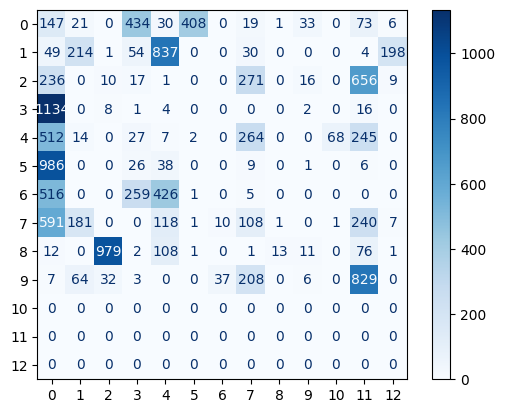

In [42]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from torch.utils.data import DataLoader
import timm

# 🔹 ชื่อคลาสที่ใช้ตอนเทรน
classname = [
    "Ant", "Bee", "Beetle", "Butterfly", "Cockroach", "Dragonfly",
    "Fly", "Frog", "Grasshopper", "Ladybug", "Mosquito", "Spider",
    "Wasp", "Lizard"
]

# 🔹 ใช้ GPU ถ้ามี
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 โหลดโมเดลโดยไม่ต้องเทรนใหม่
for fold in range(k_splits):
    print(f"\n🔹 Evaluating Fold {fold+1}/{k_splits}")

    # ✅ 1. สร้างโมเดลเปล่าก่อน (ต้องกำหนด `num_classes` ให้ตรงกับตอนเทรน)
    model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=len(classname))

    # ✅ 2. โหลดค่าถ่วงน้ำหนักจาก Checkpoint แต่ *ไม่โหลด classifier*
    checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{fold}.pt", map_location=device)

    # 🔹 ลบค่าถ่วงน้ำหนักของ classifier ออกจาก state_dict
    checkpoint = {k: v for k, v in checkpoint.items() if "classifier" not in k}

    # 🔹 โหลดค่าถ่วงน้ำหนักที่เหลือเข้าโมเดล
    model.load_state_dict(checkpoint, strict=False)  # `strict=False` เพื่อข้ามค่า classifier

    # 🔹 ย้ายโมเดลไปยัง GPU หรือ CPU
    model.to(device)
    model.eval()

    # ✅ 3. ประเมินผล
    predictions = []
    references = []

    with torch.no_grad():
        for batch in tqdm(val_dataloader):
            inputs, targets = batch
            inputs = inputs.to(device)

            outputs = model(inputs)
            preds = outputs.argmax(-1).cpu().tolist()

            predictions.extend(preds)
            references.extend(targets.tolist())

    print(f"✅ Fold {fold} - Evaluation Done!")

    # ✅ 4. แสดง Confusion Matrix
    cm = confusion_matrix(references, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classname)
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.show()

    # ✅ 5. แสดง Classification Report
    print("\n🔹 Classification Report")
    print(classification_report(references, predictions, target_names=classname))


In [42]:
classname = dataset.classes
classname

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

###Verification by sepreate data

In [43]:
test_folder = 'test'

In [44]:
from torchvision import datasets, transforms

# 🔹 สร้าง Dictionary ของ `transforms`
transforms_dict = {
    "test": transforms.Compose([
        transforms.Resize((224, 224)),  # ปรับขนาดให้ตรงกับที่ใช้เทรน
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# 🔹 โหลด Dataset ใหม่โดยใช้ `transforms_dict["test"]`
test_dataset = datasets.ImageFolder(
    root=test_folder,
    transform=transforms_dict["test"]
)


In [45]:
len(test_dataset)

3055

In [46]:
# Making test dataloader
test_dataloader = DataLoader(test_dataset, batch_size=eval_batch_size, shuffle=False, num_workers=4, pin_memory=True)

In [47]:
test_dataset.classes

['Ant',
 'Bee',
 'Beetle',
 'Butterfly',
 'Cockroach',
 'Dragonfly',
 'Fly',
 'Frog',
 'Grasshopper',
 'Ladybug',
 'Mosquito',
 'Spider',
 'Wasp',
 'lizard']

In [48]:
len(test_dataloader)

24

In [50]:
import torch
import timm
import torch.nn as nn

# 🔹 กำหนดชื่อคลาสให้ตรงกับตอนเทรน
classname = [
    "Ant", "Bee", "Beetle", "Butterfly", "Cockroach", "Dragonfly",
    "Fly", "Frog", "Grasshopper", "Ladybug", "Mosquito", "Spider",
    "Wasp", "Lizard"
]

# 🔹 ใช้ GPU ถ้ามี
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold in range(k_splits):
    print(f"\n🔹 Evaluating Fold {fold+1}/{k_splits}")

    # ✅ 1. โหลดโมเดลใหม่ แต่ไม่กำหนด num_classes
    model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=10)  # ใช้ค่า num_classes เดิมที่เทรนไว้

    # ✅ 2. โหลดค่าถ่วงน้ำหนักจาก Checkpoint
    checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{fold}.pt", map_location=device)
    model.load_state_dict(checkpoint, strict=False)

    # ✅ 3. แก้ไข classifier layer ให้มี num_classes ใหม่
    num_features = model.classifier.in_features
    model.classifier = nn.Linear(num_features, len(classname))  # เปลี่ยนให้ตรงกับจำนวนคลาสใหม่

    # ✅ 4. ตั้งค่าโมเดลให้พร้อมใช้งาน
    model.to(device)
    model.eval()

    print(f"✅ Fold {fold} - Model Loaded Successfully!")



🔹 Evaluating Fold 1/5
✅ Fold 0 - Model Loaded Successfully!

🔹 Evaluating Fold 2/5


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\3085936518.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f"mobilenetv2_100_checkpoint_fold{f

✅ Fold 1 - Model Loaded Successfully!

🔹 Evaluating Fold 3/5
✅ Fold 2 - Model Loaded Successfully!

🔹 Evaluating Fold 4/5
✅ Fold 3 - Model Loaded Successfully!

🔹 Evaluating Fold 5/5
✅ Fold 4 - Model Loaded Successfully!


##Visualization train model result

In [51]:
## Making Pridcition return class & prob
from typing import List, Tuple

from PIL import Image
def pred_class(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: T = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    if img.mode != 'RGB':
        img = img.convert('RGB')

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    classname =  class_names[target_image_pred_label]
    prob = target_image_pred_probs.max().cpu().numpy()

    return classname , prob

In [52]:
import os

model_dir = "D:/SPECIES"  # 🔹 เปลี่ยนเป็นโฟลเดอร์ที่ไฟล์โมเดลอยู่จริง
files = os.listdir(model_dir)

print("📌 รายชื่อไฟล์ในโฟลเดอร์:", model_dir)
for f in files:
    print(f)


📌 รายชื่อไฟล์ในโฟลเดอร์: D:/SPECIES
.git
.idea
.venv
classname.json
data
mobilenetv2_100_checkpoint_fold0.pt
mobilenetv2_100_checkpoint_fold1.pt
mobilenetv2_100_checkpoint_fold2.pt
mobilenetv2_100_checkpoint_fold3.pt
mobilenetv2_100_checkpoint_fold4.pt
mobilenetv2_100_full_model_fold0.pth
model
model.zip
requirements.txt
SPECIES
SPECIES.ipynb
test
val
z.py


In [53]:
model_path = "D:/SPECIES/mobilenetv2_100_checkpoint_fold0.pt"  # 🔹 เปลี่ยน path ให้ตรงกับไฟล์จริง

if os.path.exists(model_path):
    print(f"✅ พบไฟล์: {model_path}")
    loaded_model = torch.load(model_path, map_location="cuda" if torch.cuda.is_available() else "cpu")
    print("✅ โหลดโมเดลสำเร็จ!")
else:
    print(f"❌ ไม่พบไฟล์: {model_path}")


✅ พบไฟล์: D:/SPECIES/mobilenetv2_100_checkpoint_fold0.pt
✅ โหลดโมเดลสำเร็จ!


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2276556030.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(model_path, map_location="cuda" if

##Train data visulization

In [54]:
import os
import pandas as pd
from PIL import Image

# Create an empty list to store image paths
image_paths = []

# Loop through each subfolder in the "Image" directory
for root, dirs, files in os.walk('test'):
    for subfolder_name in dirs:
        # Get the path to the subfolder
        subfolder_path = os.path.join(root, subfolder_name)
        # Loop through each file in the subfolder
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            image_paths.append((image_path, subfolder_name))

# Create a DataFrame from the list of image paths
df = pd.DataFrame(image_paths, columns=['path', 'subfolder_name'])



In [55]:
df.head()

path subfolder_name
0  test\Ant\Ant_104.jpg            Ant
1  test\Ant\Ant_108.jpg            Ant
2  test\Ant\Ant_109.jpg            Ant
3  test\Ant\Ant_120.jpg            Ant
4  test\Ant\Ant_121.jpg            Ant

In [56]:
print(len(classname))
print(classname)


14
['Ant', 'Bee', 'Beetle', 'Butterfly', 'Cockroach', 'Dragonfly', 'Fly', 'Frog', 'Grasshopper', 'Ladybug', 'Mosquito', 'Spider', 'Wasp', 'Lizard']


In [57]:
# ✅ โหลดโครงสร้างโมเดลใหม่
model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=14)

# ✅ โหลดค่าถ่วงน้ำหนักจาก Checkpoint โดยข้าม classifier
state_dict = torch.load("mobilenetv2_100_checkpoint_fold0.pt", map_location=device)
state_dict.pop("classifier.weight", None)
state_dict.pop("classifier.bias", None)

model.load_state_dict(state_dict, strict=False)  # ✅ strict=False เพื่อข้าม classifier ที่ไม่ตรงกัน

# ✅ ส่งโมเดลไปยัง GPU ถ้ามี
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\3652826953.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("mobilenetv2_100_checkpoint_fold0.pt

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): ReLU6(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU6(inplace=True)
        )
        (aa): Identity()
        (se): Identity()
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
        (drop_path): Identity()
      )
    )
    (1): Sequent

In [58]:
# ✅ รีเซ็ต Fully Connected Layer ให้ตรงกับ `num_classes=14`
model.classifier = torch.nn.Linear(model.classifier.in_features, 14)


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2503989682.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f"mobilenetv2_100_checkpoint_fold{fo

Fold: 0


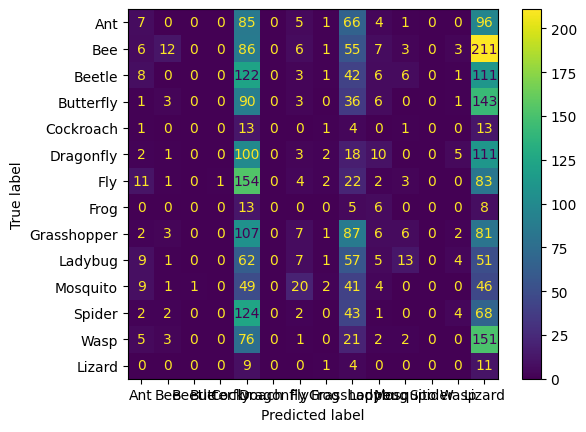

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2503989682.py:

              precision    recall  f1-score   support

         Ant       0.11      0.03      0.04       265
         Bee       0.44      0.03      0.06       390
      Beetle       0.00      0.00      0.00       300
   Butterfly       0.00      0.00      0.00       283
   Cockroach       0.01      0.39      0.02        33
   Dragonfly       0.00      0.00      0.00       252
         Fly       0.07      0.01      0.02       283
        Frog       0.00      0.00      0.00        32
 Grasshopper       0.17      0.29      0.22       302
     Ladybug       0.08      0.02      0.04       210
    Mosquito       0.00      0.00      0.00       173
      Spider       0.00      0.00      0.00       246
        Wasp       0.00      0.00      0.00       261
      Lizard       0.01      0.44      0.02        25

    accuracy                           0.05      3055
   macro avg       0.06      0.09      0.03      3055
weighted avg       0.10      0.05      0.04      3055



100%|██████████| 24/24 [00:22<00:00,  1.06it/s]


Fold: 1


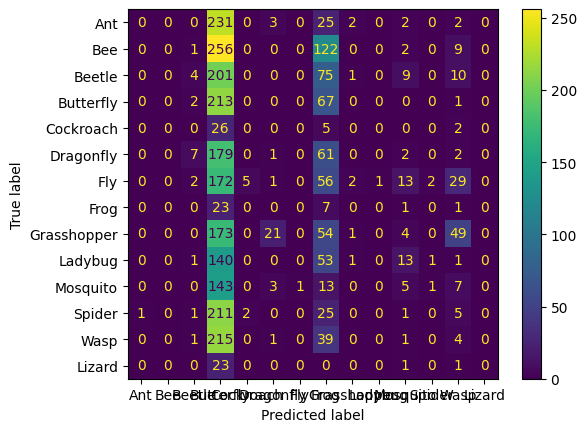

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2503989682.py:

              precision    recall  f1-score   support

         Ant       0.00      0.00      0.00       265
         Bee       0.00      0.00      0.00       390
      Beetle       0.21      0.01      0.03       300
   Butterfly       0.10      0.75      0.17       283
   Cockroach       0.00      0.00      0.00        33
   Dragonfly       0.03      0.00      0.01       252
         Fly       0.00      0.00      0.00       283
        Frog       0.01      0.22      0.02        32
 Grasshopper       0.14      0.00      0.01       302
     Ladybug       0.00      0.00      0.00       210
    Mosquito       0.09      0.03      0.04       173
      Spider       0.00      0.00      0.00       246
        Wasp       0.03      0.02      0.02       261
      Lizard       0.00      0.00      0.00        25

    accuracy                           0.08      3055
   macro avg       0.04      0.07      0.02      3055
weighted avg       0.05      0.08      0.02      3055



100%|██████████| 24/24 [00:20<00:00,  1.17it/s]


Fold: 2


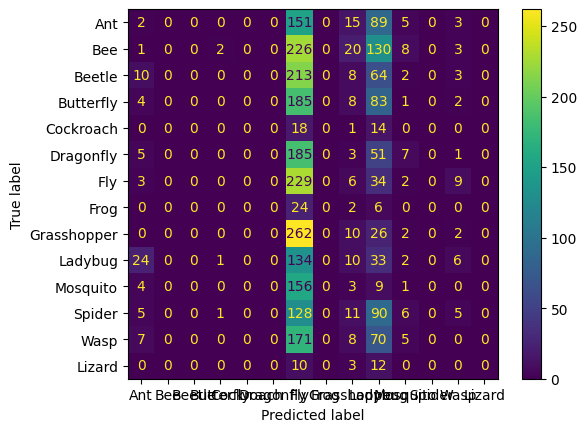

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2503989682.py:

              precision    recall  f1-score   support

         Ant       0.03      0.01      0.01       265
         Bee       0.00      0.00      0.00       390
      Beetle       0.00      0.00      0.00       300
   Butterfly       0.00      0.00      0.00       283
   Cockroach       0.00      0.00      0.00        33
   Dragonfly       0.00      0.00      0.00       252
         Fly       0.11      0.81      0.19       283
        Frog       0.00      0.00      0.00        32
 Grasshopper       0.09      0.03      0.05       302
     Ladybug       0.05      0.16      0.07       210
    Mosquito       0.02      0.01      0.01       173
      Spider       0.00      0.00      0.00       246
        Wasp       0.00      0.00      0.00       261
      Lizard       0.00      0.00      0.00        25

    accuracy                           0.09      3055
   macro avg       0.02      0.07      0.02      3055
weighted avg       0.03      0.09      0.03      3055



100%|██████████| 24/24 [00:20<00:00,  1.15it/s]


Fold: 3


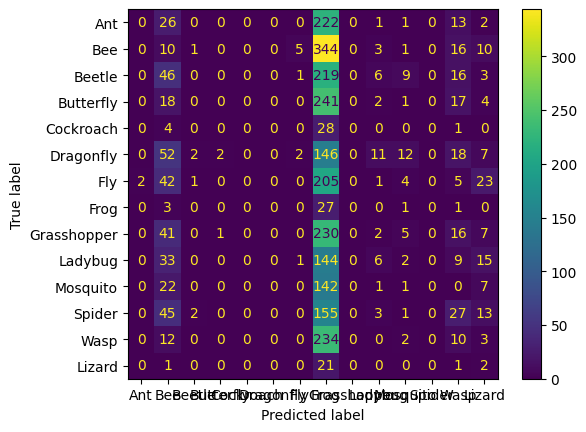

D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2503989682.py:

              precision    recall  f1-score   support

         Ant       0.00      0.00      0.00       265
         Bee       0.03      0.03      0.03       390
      Beetle       0.00      0.00      0.00       300
   Butterfly       0.00      0.00      0.00       283
   Cockroach       0.00      0.00      0.00        33
   Dragonfly       0.00      0.00      0.00       252
         Fly       0.00      0.00      0.00       283
        Frog       0.01      0.84      0.02        32
 Grasshopper       0.00      0.00      0.00       302
     Ladybug       0.17      0.03      0.05       210
    Mosquito       0.03      0.01      0.01       173
      Spider       0.00      0.00      0.00       246
        Wasp       0.07      0.04      0.05       261
      Lizard       0.02      0.08      0.03        25

    accuracy                           0.02      3055
   macro avg       0.02      0.07      0.01      3055
weighted avg       0.02      0.02      0.01      3055



100%|██████████| 24/24 [00:21<00:00,  1.14it/s]


Fold: 4


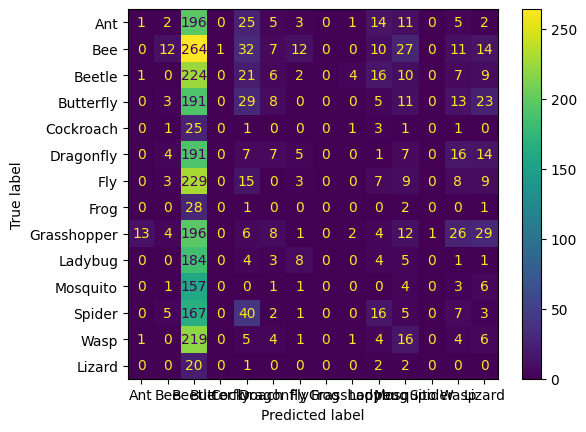

              precision    recall  f1-score   support

         Ant       0.06      0.00      0.01       265
         Bee       0.34      0.03      0.06       390
      Beetle       0.10      0.75      0.17       300
   Butterfly       0.00      0.00      0.00       283
   Cockroach       0.01      0.03      0.01        33
   Dragonfly       0.14      0.03      0.05       252
         Fly       0.08      0.01      0.02       283
        Frog       0.00      0.00      0.00        32
 Grasshopper       0.22      0.01      0.01       302
     Ladybug       0.05      0.02      0.03       210
    Mosquito       0.03      0.02      0.03       173
      Spider       0.00      0.00      0.00       246
        Wasp       0.04      0.02      0.02       261
      Lizard       0.00      0.00      0.00        25

    accuracy                           0.09      3055
   macro avg       0.08      0.07      0.03      3055
weighted avg       0.11      0.09      0.04      3055



D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SPECIES\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
for fold in range(k_splits):
    predictions = []
    references = []

    # ✅ 1. โหลดโครงสร้างโมเดลใหม่ (ให้ตรงกับจำนวนคลาสปัจจุบัน)
    model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=len(classname))

    # ✅ 2. โหลด state_dict จาก Checkpoint โดยข้าม `classifier`
    state_dict = torch.load(f"mobilenetv2_100_checkpoint_fold{fold}.pt", map_location=device)

    # ลบค่าถ่วงน้ำหนักที่ไม่ตรงกัน
    state_dict.pop("classifier.weight", None)
    state_dict.pop("classifier.bias", None)

    model.load_state_dict(state_dict, strict=False)  # ✅ ข้ามค่าที่ไม่ตรงกัน

    # ✅ 3. รีเซ็ต `classifier` ให้ตรงกับ `num_classes`
    model.classifier = torch.nn.Linear(model.classifier.in_features, len(classname))

    # ✅ 4. ส่งโมเดลไปยัง GPU ถ้ามี
    model.to(device)
    model.eval()

    # ✅ 5. เริ่มทำนาย
    with torch.no_grad():
        for batch in tqdm(test_dataloader):
            inputs, targets = batch
            inputs = inputs.to(device)
            outputs = model(inputs)

            # Log Values
            predictions += outputs.argmax(-1).detach().cpu().tolist()
            references += targets.tolist()

    print(f"Fold: {fold}")

    # ✅ 6. คำนวณ Confusion Matrix
    cm = confusion_matrix(references, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classname)
    disp.plot()
    plt.show()

    # ✅ 7. Classification Report
    print(classification_report(references, predictions, target_names=classname))


In [69]:
import torch
import timm

# ✅ 1. โหลดโครงสร้างโมเดลใหม่
model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=len(classname))

# ✅ 2. โหลด state_dict จาก Checkpoint และแก้ปัญหา classifier mismatch
state_dict = torch.load("mobilenetv2_100_checkpoint_fold0.pt", map_location=device)

# ลบค่าถ่วงน้ำหนักของ classifier ที่ไม่ตรงกับ num_classes
state_dict.pop("classifier.weight", None)
state_dict.pop("classifier.bias", None)

# ✅ 3. โหลดค่าถ่วงน้ำหนักที่เหลือเข้าโมเดล
model.load_state_dict(state_dict, strict=False)

# ✅ 4. รีเซ็ต classifier ให้ตรงกับจำนวนคลาสใหม่
model.classifier = torch.nn.Linear(model.classifier.in_features, len(classname))

# ✅ 5. ส่งโมเดลไปยัง GPU ถ้ามี และตั้งเป็น `eval()` สำหรับการทำนาย
model.to(device)
model.eval()

# ✅ 6. ใช้โมเดลที่แก้ไขแล้วในฟังก์ชัน sample_picture
loaded_model = model  # ตั้ง loaded_model ให้เป็นโมเดลที่แก้ไขแล้ว


C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\3792743077.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("mobilenetv2_100_checkpoint_fold0.pt

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sample_picture(df=df,random_state=None):
    # Sample 20 random rows from the DataFrame
    sample_df = df.sample(20, random_state=random_state).copy()
    sample_df = sample_df.reset_index(drop=True)
    # Define the grid layout for displaying the images
    num_rows = 4
    num_cols = 5
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    fig.tight_layout(pad=5.0)

    # Iterate over the sampled rows and display the images in the grid
    for i, row in sample_df.iterrows():
        img = Image.open(row['path'])

        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Prediction
        pred_name , prob = pred_class(model=loaded_model,image_path=row['path'],
                   class_names = classname,
                   transform=transforms["test"])



        row_idx = i // num_cols
        col_idx = i % num_cols
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].axis('on')
        axs[row_idx, col_idx].set_title(row['subfolder_name'] + ': \nPredict:' + pred_name + '\nProb:'+ str(prob.round(decimals=2)) )

        # prediction


    plt.show()

TypeError: 'module' object is not subscriptable

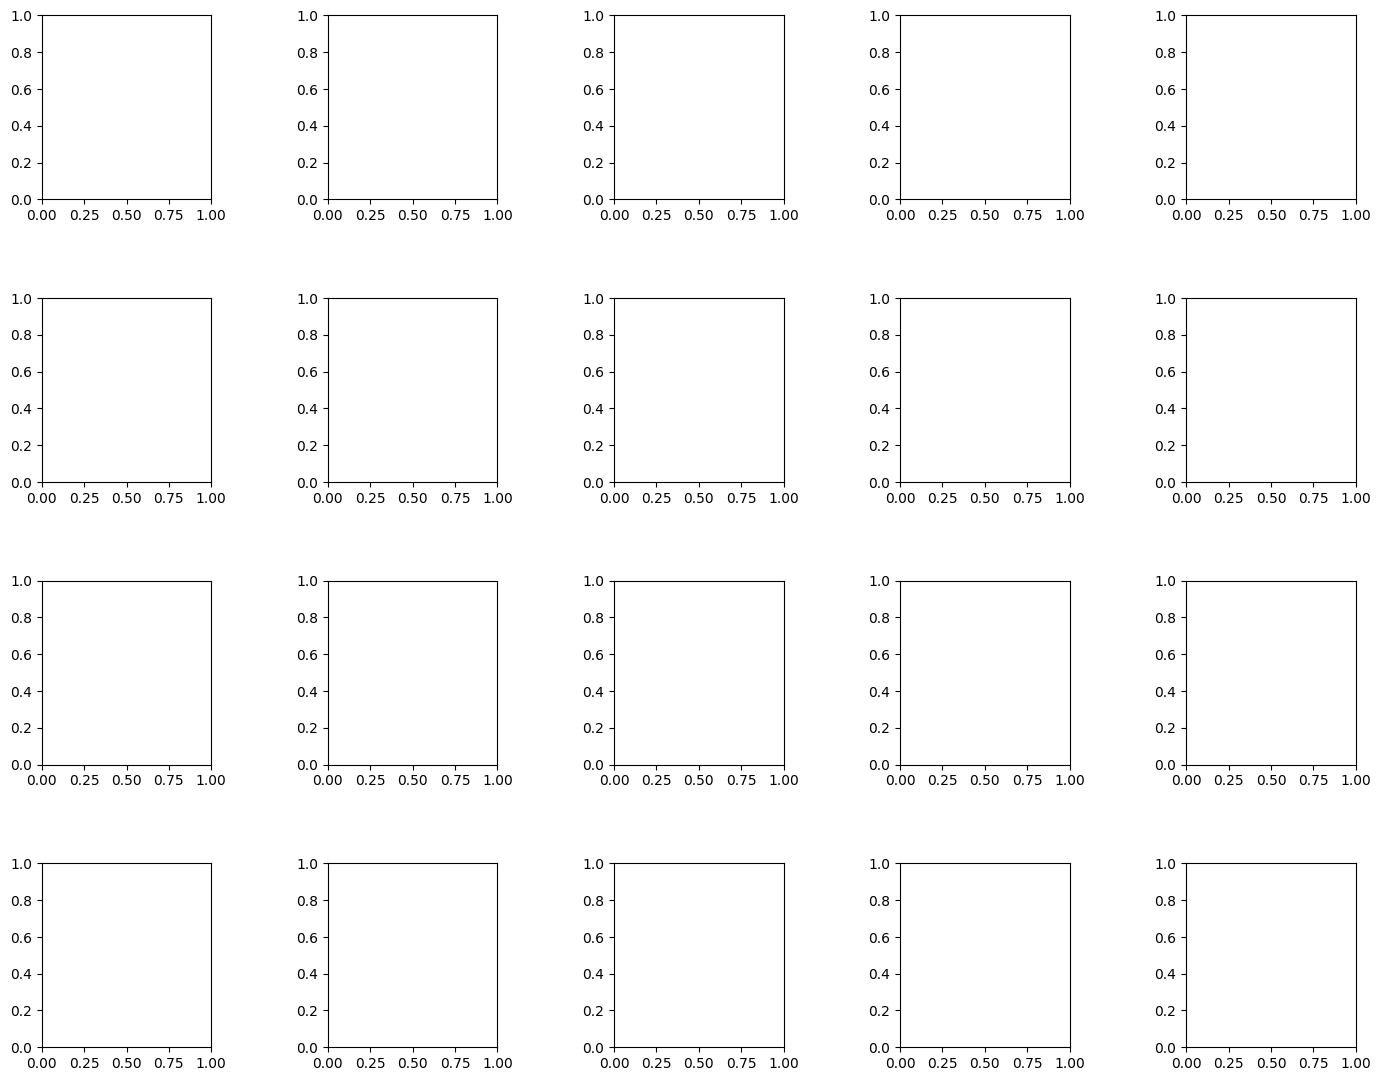

In [72]:
sample_picture()

TypeError: 'module' object is not subscriptable

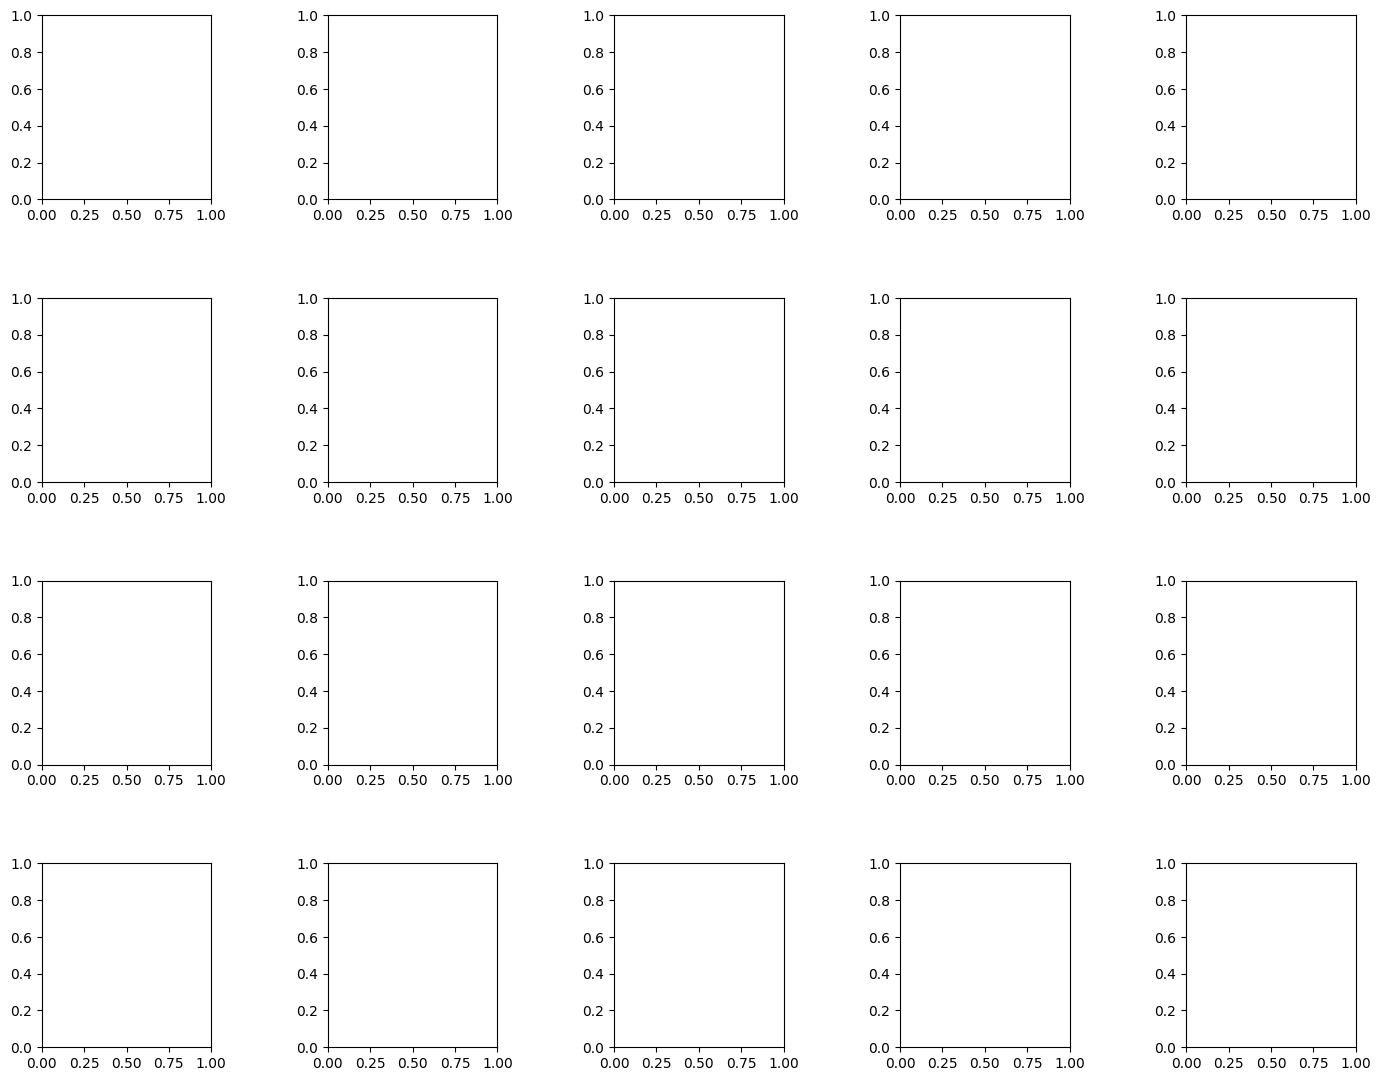

In [68]:
sample_picture()

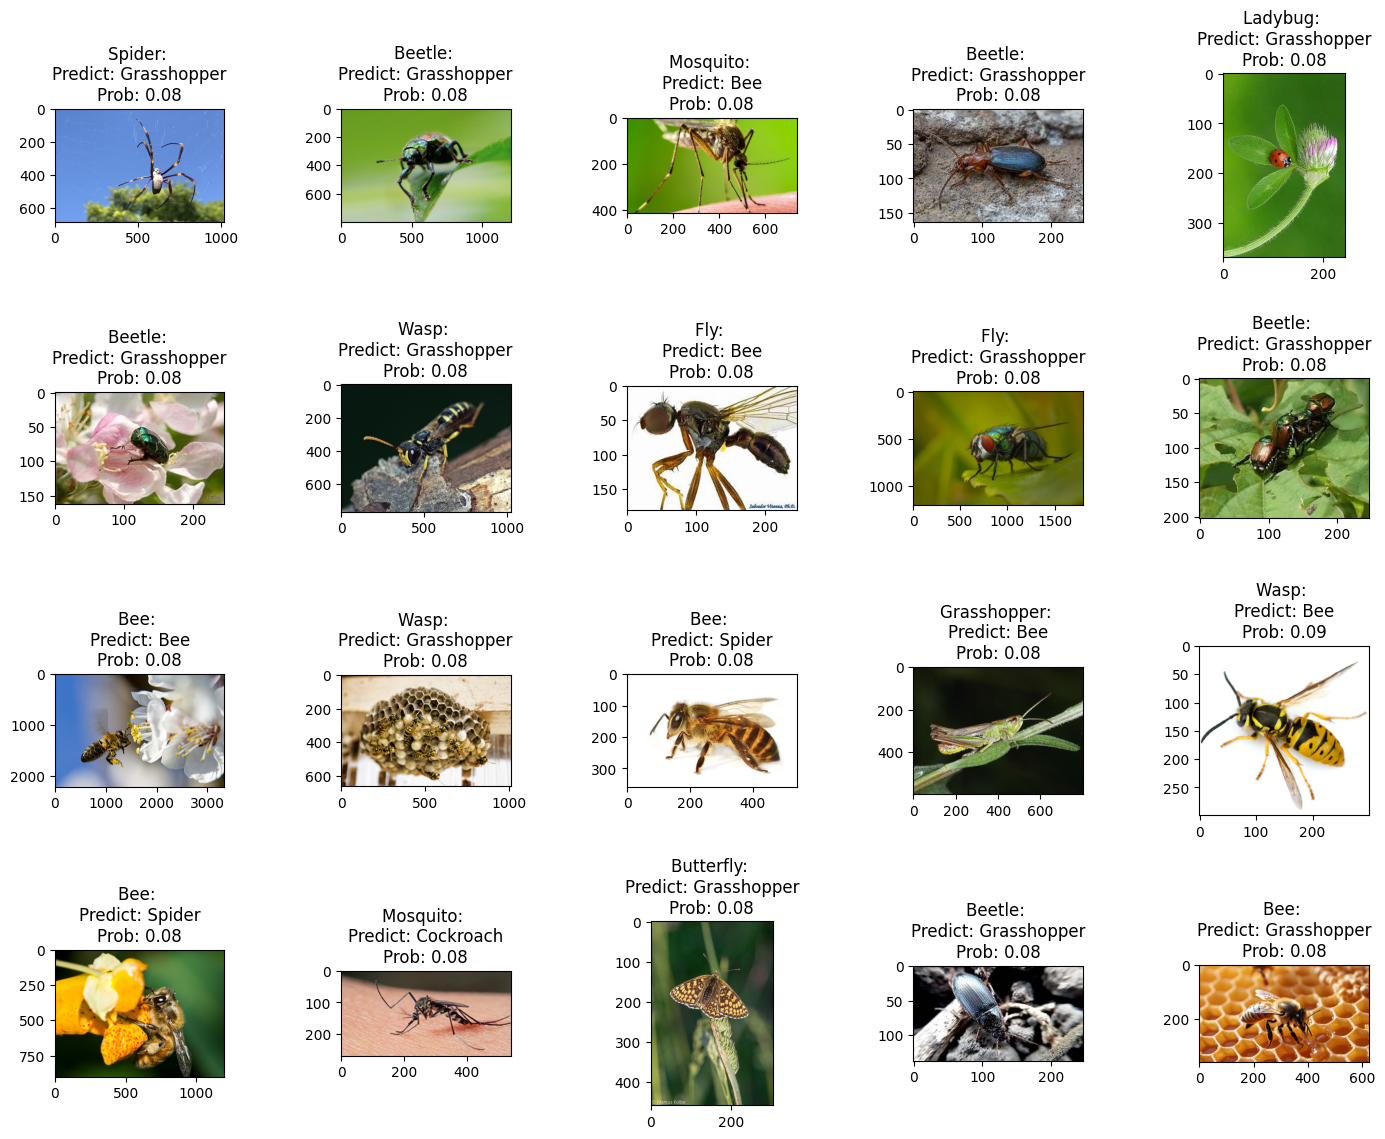

In [85]:
sample_picture()

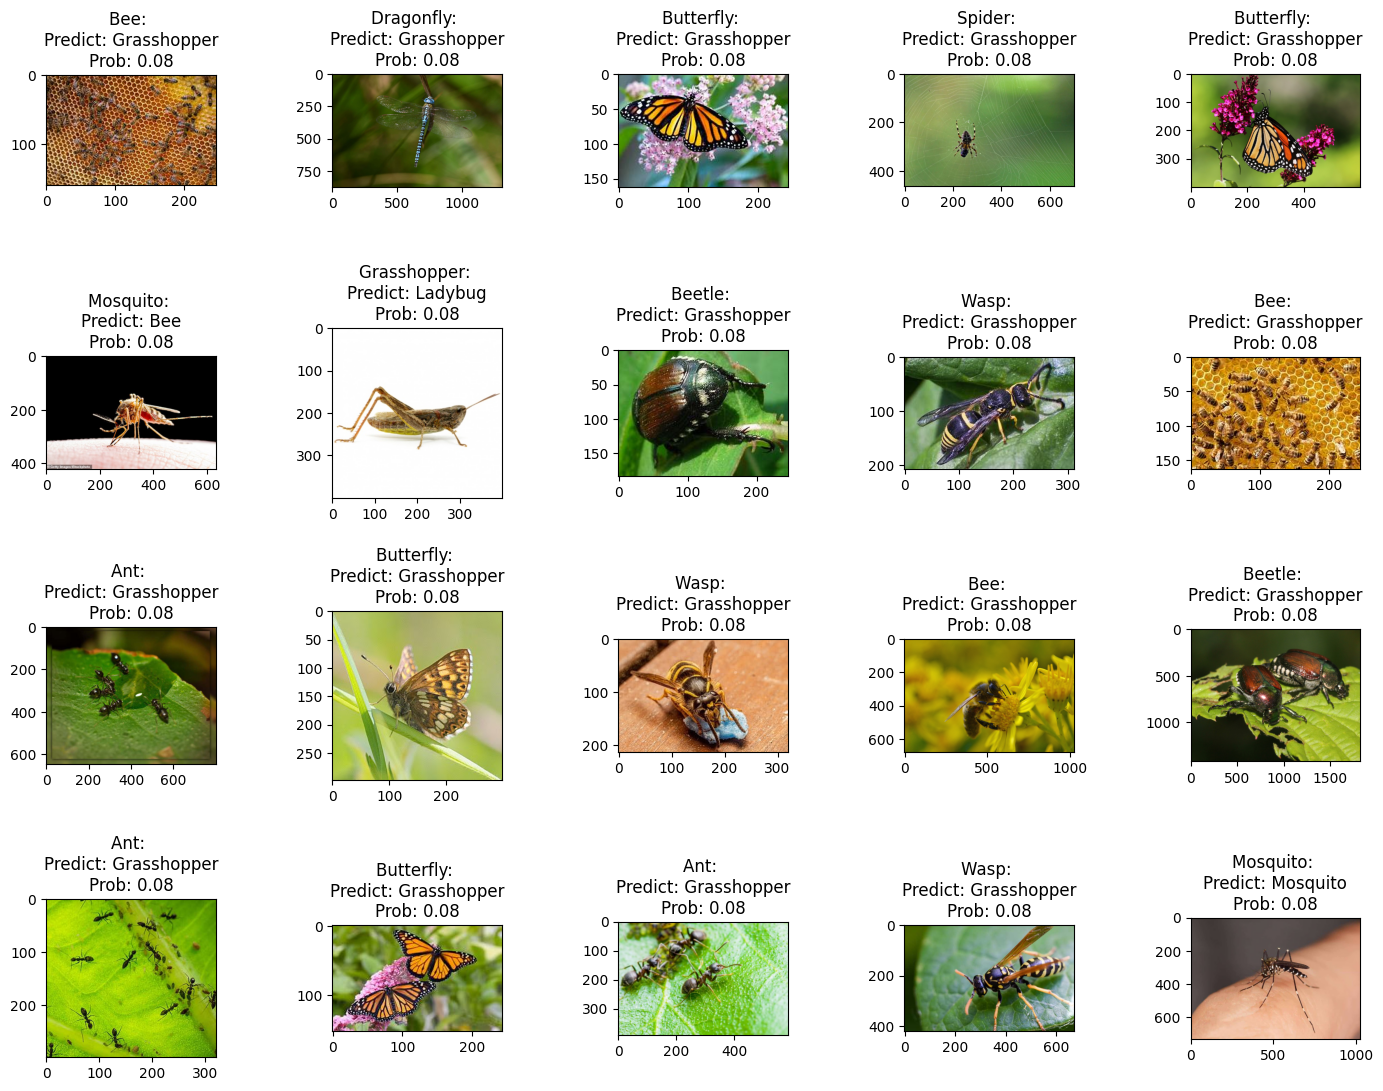

In [86]:
sample_picture()

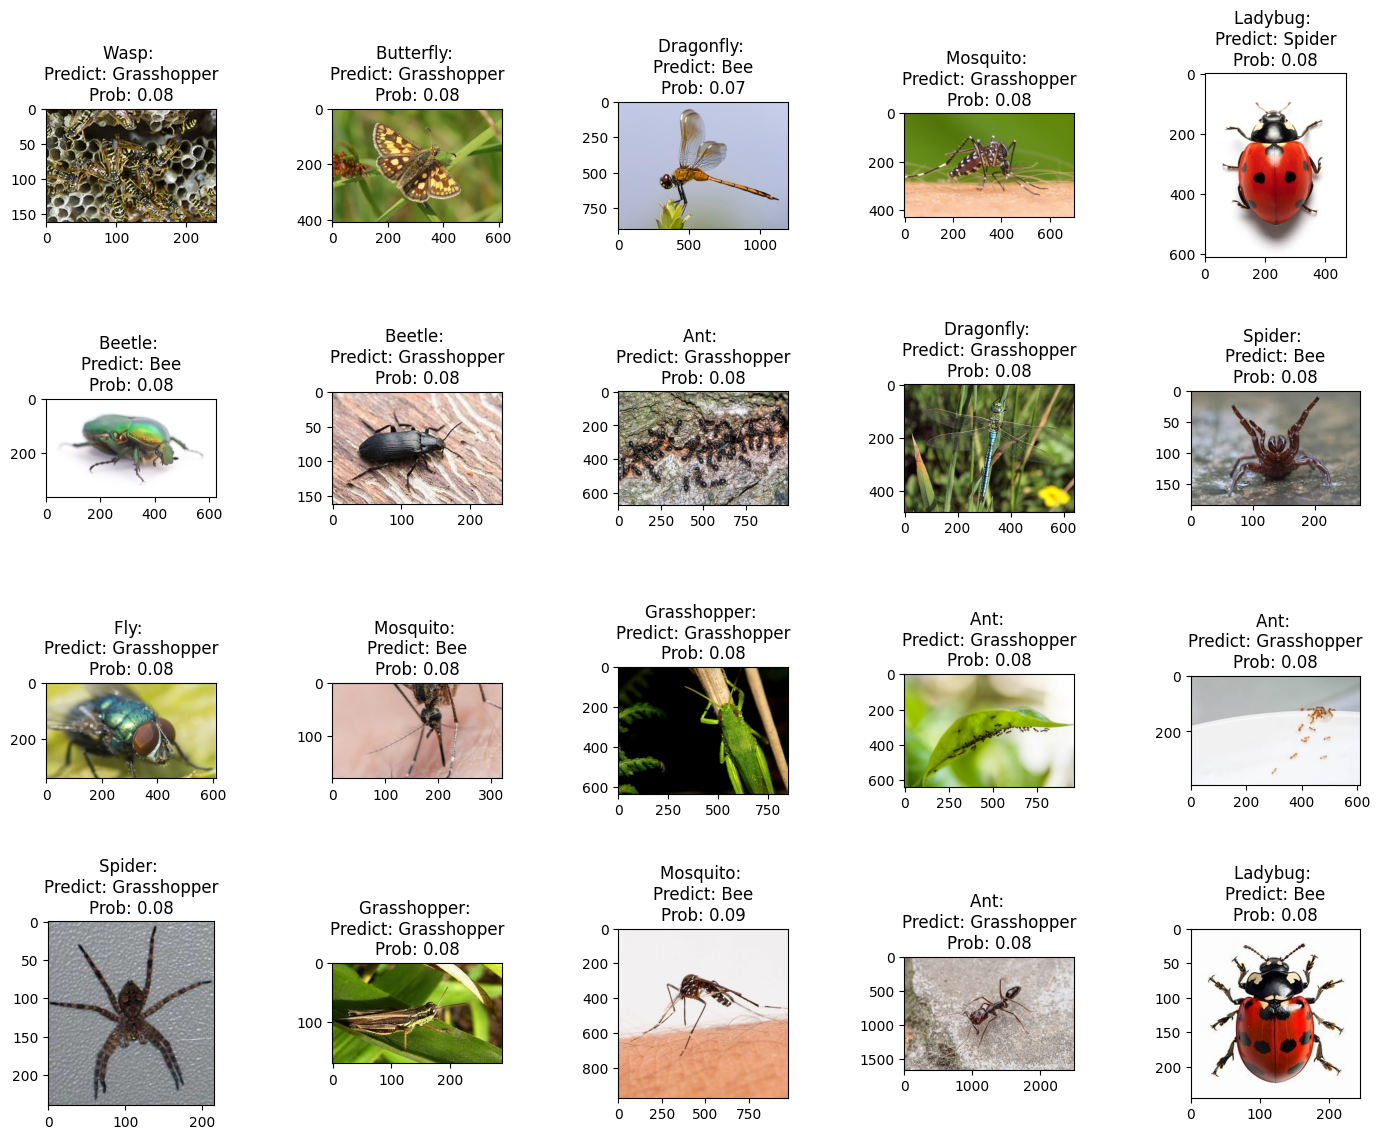

In [87]:
sample_picture()

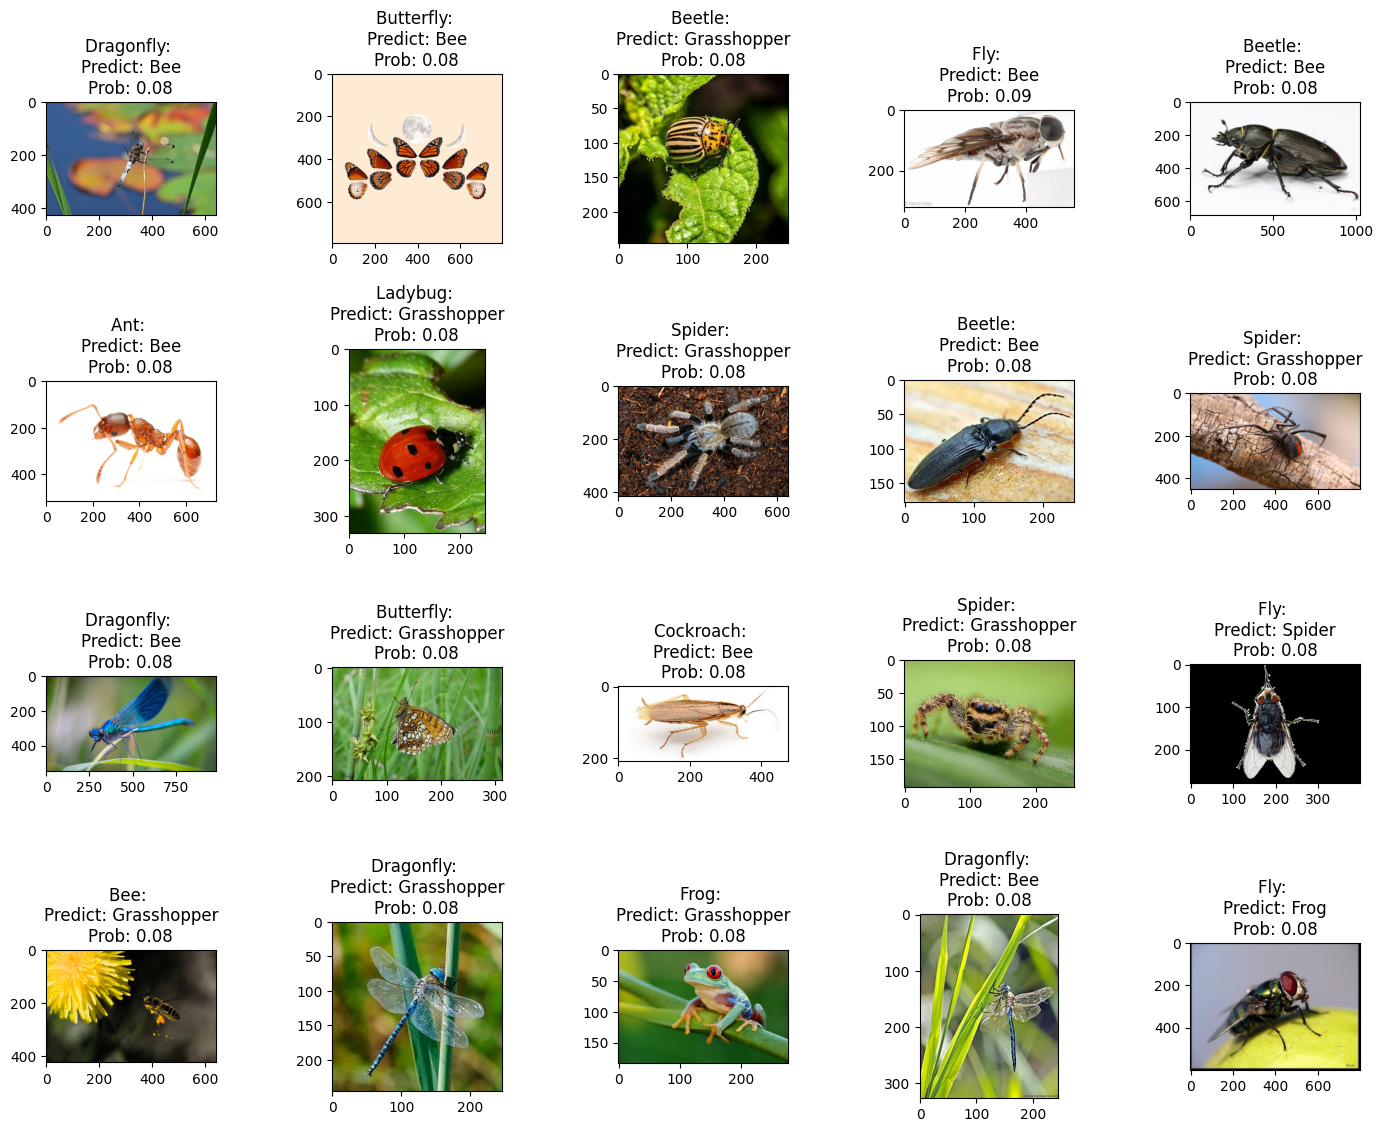

In [88]:
sample_picture()

## โหลดโมเดล

In [91]:
import torch
import timm

# ✅ กำหนดอุปกรณ์ (ใช้ GPU ถ้ามี)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ สร้างโมเดลใหม่ให้ตรงกับที่เคยเทรน
model = timm.create_model("mobilenetv2_100", pretrained=False, num_classes=14)  # เปลี่ยน num_classes ให้ตรงกับของเดิม

# ✅ โหลดค่าถ่วงน้ำหนัก (state_dict)
model.load_state_dict(torch.load("mobilenetv2_100_checkpoint_fold0.pt", map_location=device))

# ✅ ส่งโมเดลไปยัง GPU ถ้ามี
model.to(device)
model.eval()

print("✅ โมเดลถูกโหลดสำเร็จ พร้อมใช้งาน!")


C:\Users\raknu\AppData\Local\Temp\ipykernel_16508\673253027.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mobilenetv2_100_checkpoint

RuntimeError: Error(s) in loading state_dict for EfficientNet:
	size mismatch for classifier.weight: copying a param with shape torch.Size([10, 1280]) from checkpoint, the shape in current model is torch.Size([14, 1280]).
	size mismatch for classifier.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([14]).

In [92]:
import os

# ✅ พาธที่ต้องการบันทึก
save_path = r"D:\SPECIES\mobilenetv2_100_full_model_fold0.pth"

# ✅ สร้างโฟลเดอร์ถ้ายังไม่มี
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# ✅ บันทึกโมเดลแบบเต็ม
torch.save(model, save_path)

print(f"✅ โมเดลถูกบันทึกเป็นไฟล์แบบเต็มไว้ที่: {save_path}")


✅ โมเดลถูกบันทึกเป็นไฟล์แบบเต็มไว้ที่: D:\SPECIES\mobilenetv2_100_full_model_fold0.pth


In [99]:
import json


# ✅ กำหนดชื่อไฟล์ JSON
json_filename = "classname.json"

# ✅ บันทึกข้อมูลลงไฟล์ JSON
with open(json_filename, "w") as json_file:
    json.dump(classname, json_file, indent=4)

print(f"✅ บันทึก classname เป็น JSON ไว้ที่: {json_filename}")

✅ บันทึก classname เป็น JSON ไว้ที่: classname.json


In [5]:
state_dict = torch.load("mobilenetv2_100_full_model_fold0.pth")

C:\Users\raknu\AppData\Local\Temp\ipykernel_14688\2931475329.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("mobilenetv2_100_full_model_fold0.pt